In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict
from matplotlib.patches import Circle, Rectangle, Arc

In [2]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer

In [3]:
from nba_api.stats.endpoints.playerdashboardbyshootingsplits import PlayerDashboardByShootingSplits

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
saric_id = find_players_by_full_name("Dario Saric")[0]['id']

In [6]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2016, 2021)]

In [7]:
suns_primary = '#E56020'
suns_secondary = '#1D1160'

### Cur Season usage and TS%

In [8]:
adv_stats = LeagueDashPlayerStats(season='2020-21', measure_type_detailed_defense='Advanced').get_data_frames()[0]

In [9]:
bench_players = LeagueDashPlayerStats(season='2020-21', measure_type_detailed_defense='Advanced', starter_bench_nullable='Bench').get_data_frames()[0]

In [10]:
adv_stats = adv_stats.loc[(adv_stats.MIN > 10) & (adv_stats.GP > 10)]
bench_players = bench_players.loc[(bench_players.MIN > 10) & (bench_players.GP > 15)]



In [11]:
bench_merge = pd.merge(left=adv_stats, right=bench_players, on=('PLAYER_ID', 'PLAYER_NAME'), suffixes=('_ALL', '_BENCH'))

In [12]:
bench_merge.loc[:, 'BENCH_RATIO'] = bench_merge.GP_BENCH / bench_merge.GP_ALL

In [13]:
bench_merge = bench_merge.loc[(bench_merge.MIN_ALL > 10) & (bench_merge.GP_BENCH > 15)]

In [14]:
bench_merge = bench_merge.loc[bench_merge.BENCH_RATIO > 0.75]

In [15]:
bench_merge.sort_values(by='USG_PCT_BENCH', ascending=False)

PLAYER_ID        PLAYER_NAME  TEAM_ID_ALL TEAM_ABBREVIATION_ALL  AGE_ALL  \
89      203903    Jordan Clarkson   1610612762                   UTA     28.0   
39      201565       Derrick Rose   1610612752                   NYK     32.0   
64     1630193  Immanuel Quickley   1610612752                   NYK     21.0   
93     1628367       Josh Jackson   1610612765                   DET     24.0   
31      203967        Dario Saric   1610612756                   PHX     26.0   
..         ...                ...          ...                   ...      ...   
23     1629643        Chuma Okeke   1610612753                   ORL     22.0   
151     201959         Taj Gibson   1610612752                   NYK     35.0   
115     203118         Mike Scott   1610612755                   PHI     32.0   
169     202083    Wesley Matthews   1610612747                   LAL     34.0   
112    1629680   Matisse Thybulle   1610612755                   PHI     24.0   

     GP_ALL  W_ALL  L_ALL  W_PCT_ALL  MIN_ALL  ...  sp_work_PACE_RANK_BENCH  \
89       39     29     10      0.744     26.0  ...                      260   
39       25     11     14      0.440     23.5  ...                      274   
64       37     18     19      0.486     19.9  ...                      363   
93       35      9     26      0.257     24.7  ...                      320   
31       20     14      6      0.700     18.9  ...                      252   
..      ...    ...    ...        ...      ...  ...                      ...   
23       23      9     14      0.391     22.2  ...                      211   
151      16      9      7      0.563     17.1  ...                      324   
115      21     16      5      0.762     17.2  ...                      188   
169      33     20     13      0.606     20.5  ...                      311   
112      37     27     10      0.730     18.4  ...                      136   

     PIE_RANK_BENCH  FGM_RANK_BENCH  FGA_RANK_BENCH  FGM_PG_RANK_BENCH  \
89               45               1               1                  4   
39               31              28              19                 19   
64               47              13               6                 53   
93              168              12              10                 24   
31               49              55              65                 37   
..              ...             ...             ...                ...   
23              249             157             147                202   
151             202             193             216                206   
115             264             230             215                274   
169             338             154             127                262   
112             324             144             122                265   

     FGA_PG_RANK_BENCH  FG_PCT_RANK_BENCH  CFID_BENCH      CFPARAMS_BENCH  \
89                   3                161           5   203903,1610612762   
39                  10                216           5   201565,1610612752   
64                  31                250           5  1630193,1610612752   
93                  14                197           5  1628367,1610612765   
31                  54                101           5   203967,1610612756   
..                 ...                ...         ...                 ...   
23                 186                252           5  1629643,1610612753   
151                257                 39           5   201959,1610612752   
115                267                249           5   203118,1610612755   
169                222                310           5   202083,1610612747   
112                238                272           5  1629680,1610612755   

     BENCH_RATIO  
89      1.000000  
39      0.880000  
64      0.945946  
93      0.828571  
31      1.000000  
..           ...  
23      0.913043  
151     1.000000  
115     0.809524  
169     0.878788  
112     0.891892  

[138 rows x 157 columns]

In [16]:
final_bench_players = bench_merge.sort_values(by='USG_PCT_BENCH', ascending=False).iloc[:15]

In [17]:
adv_stats.loc[:, 'USG_PCT'] = adv_stats.USG_PCT * 100
adv_stats.loc[:, 'TS_PCT'] = adv_stats.TS_PCT * 100

In [18]:
phx_players = adv_stats.loc[adv_stats.TEAM_ABBREVIATION == 'PHX']
other_bench = adv_stats.loc[(adv_stats.PLAYER_ID.isin(final_bench_players.PLAYER_ID.tolist())) & (adv_stats.TEAM_ABBREVIATION != 'PHX')]
other = adv_stats.loc[(adv_stats.TEAM_ABBREVIATION != 'PHX') & (~adv_stats.PLAYER_ID.isin(other_bench.PLAYER_ID.tolist()))]

In [19]:
she_she = phx_players.loc[phx_players.PLAYER_ID == saric_id]
#phx_players = phx_players.loc[phx_players.PLAYER_ID != saric_id]

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


24

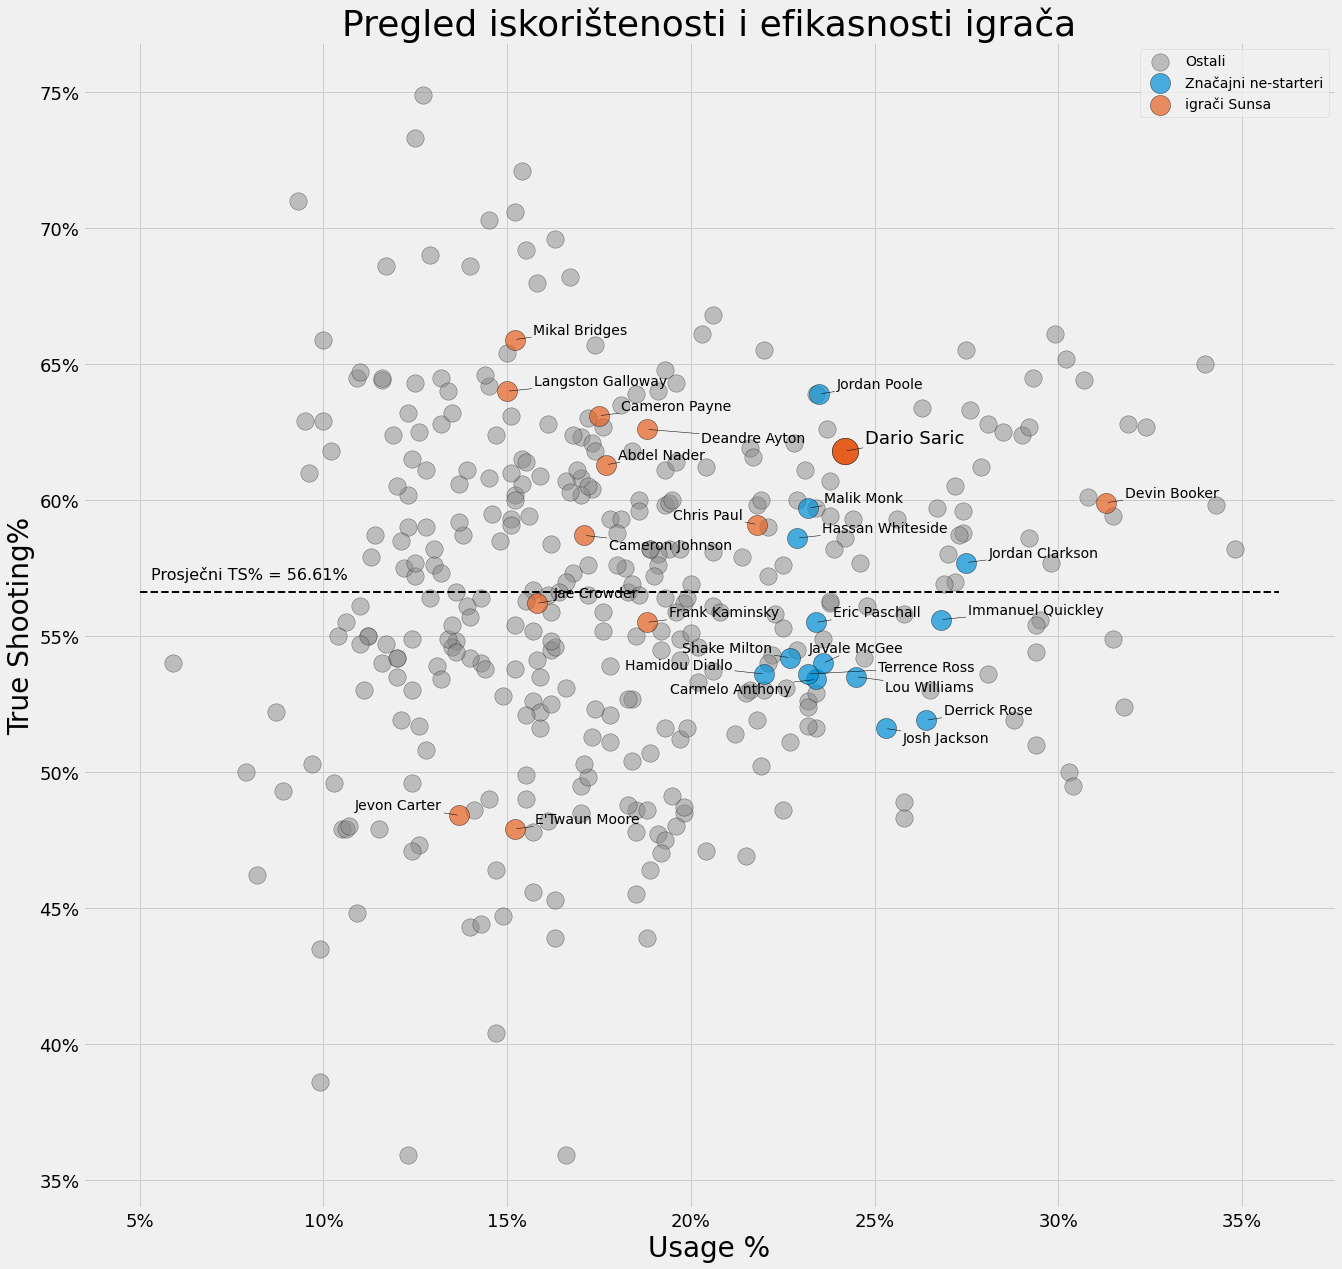

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other.USG_PCT, y=other.TS_PCT, s=300, color='#898989', alpha=0.5, edgecolors='black', label='Ostali')
ax.scatter(x=other_bench.USG_PCT, y=other_bench.TS_PCT, s=400, alpha=0.7, edgecolors='black', label='Značajni ne-starteri')
ax.scatter(x=phx_players.USG_PCT, y=phx_players.TS_PCT, s=400, color=suns_primary, alpha=0.7, edgecolors='black', label='igrači Sunsa')
ax.scatter(x=she_she.USG_PCT, y=she_she.TS_PCT, s=700, color=suns_primary, alpha=1.0, edgecolors='black')

texts = []
for i in range(len(phx_players)):
    item = phx_players.iloc[i]
    texts.append(ax.text(x=item.USG_PCT, y=item.TS_PCT, s=item.PLAYER_NAME, size=18 if item.PLAYER_ID == saric_id else 14, color='black'))

for i in range(len(other_bench)):
    item = other_bench.iloc[i]
    texts.append(ax.text(x=item.USG_PCT, y=item.TS_PCT, s=item.PLAYER_NAME, size=14, color='black'))

ax.set_xlabel("Usage %", size=28)
ax.set_ylabel("True Shooting%", size=28)
ax.set_title("Pregled iskorištenosti i efikasnosti igrača", size=36)
ax.tick_params(labelsize=18)
ax.set_xticklabels([f"{int(item)}%" for item in ax.get_xticks()])
ax.set_yticklabels([f"{int(item)}%" for item in ax.get_yticks()])
ax.hlines(y=adv_stats.TS_PCT.mean(), xmin=5, xmax=36, ls='--', lw=2, color='black')
ax.legend()
ax.text(x=5.3, y=adv_stats.TS_PCT.mean()+0.5, s=f'Prosječni TS% = {adv_stats.TS_PCT.mean():.2f}%', size=16, ha='left')
adjust_text(texts, arrowprops={'arrowstyle': '-', 'color': 'black'}, expand_points=(1.4, 1.4))

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


24

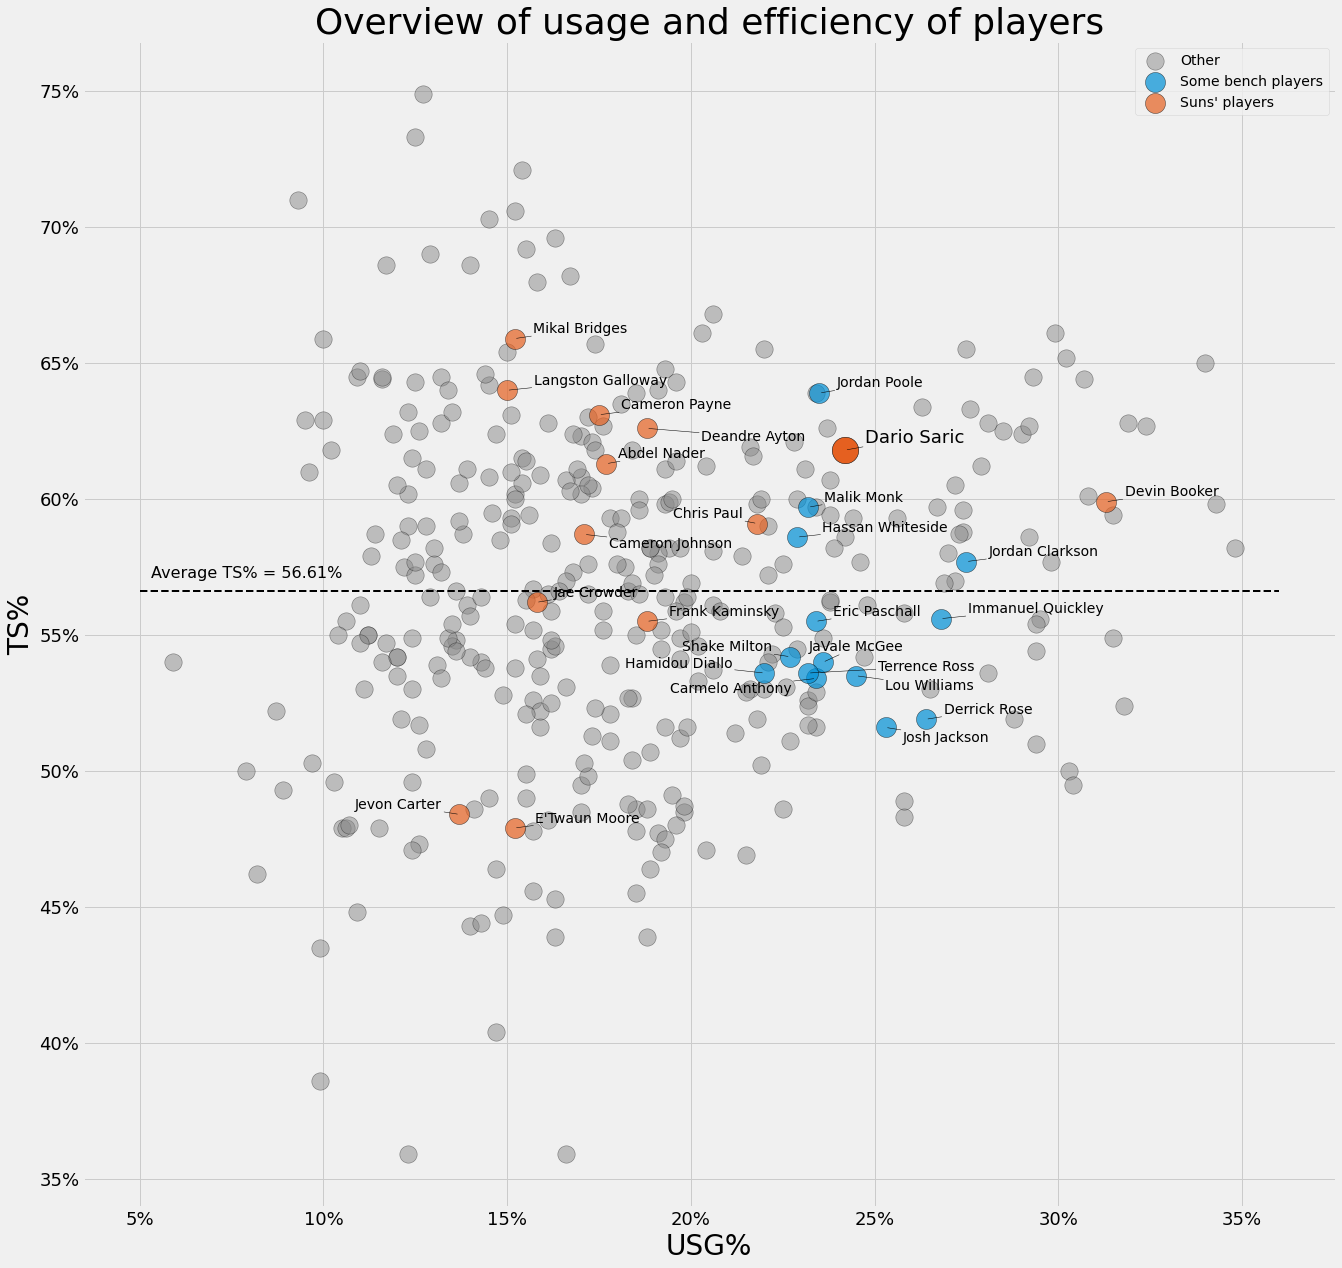

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other.USG_PCT, y=other.TS_PCT, s=300, color='#898989', alpha=0.5, edgecolors='black', label='Other')
ax.scatter(x=other_bench.USG_PCT, y=other_bench.TS_PCT, s=400, alpha=0.7, edgecolors='black', label='Some bench players')
ax.scatter(x=phx_players.USG_PCT, y=phx_players.TS_PCT, s=400, color=suns_primary, alpha=0.7, edgecolors='black', label="Suns' players")
ax.scatter(x=she_she.USG_PCT, y=she_she.TS_PCT, s=700, color=suns_primary, alpha=1.0, edgecolors='black')

texts = []
for i in range(len(phx_players)):
    item = phx_players.iloc[i]
    texts.append(ax.text(x=item.USG_PCT, y=item.TS_PCT, s=item.PLAYER_NAME, size=18 if item.PLAYER_ID == saric_id else 14, color='black'))

for i in range(len(other_bench)):
    item = other_bench.iloc[i]
    texts.append(ax.text(x=item.USG_PCT, y=item.TS_PCT, s=item.PLAYER_NAME, size=14, color='black'))

ax.set_xlabel("USG%", size=28)
ax.set_ylabel("TS%", size=28)
ax.set_title("Overview of usage and efficiency of players", size=36)
ax.tick_params(labelsize=18)
ax.set_xticklabels([f"{int(item)}%" for item in ax.get_xticks()])
ax.set_yticklabels([f"{int(item)}%" for item in ax.get_yticks()])
ax.hlines(y=adv_stats.TS_PCT.mean(), xmin=5, xmax=36, ls='--', lw=2, color='black')
ax.legend()
ax.text(x=5.3, y=adv_stats.TS_PCT.mean()+0.5, s=f'Average TS% = {adv_stats.TS_PCT.mean():.2f}%', size=16, ha='left')
adjust_text(texts, arrowprops={'arrowstyle': '-', 'color': 'black'}, expand_points=(1.4, 1.4))

## Shot Selection

In [23]:
player_splits = PlayerDashboardByShootingSplits(player_id=saric_id, season='2020-21')

In [24]:
zones = []
for season in seasons:
    player_splits = PlayerDashboardByShootingSplits(player_id=saric_id, season=season)
    zones.append(player_splits.get_data_frames()[3])
    time.sleep(0.2)

In [25]:
formatted_zones = []
for index, zone in enumerate(zones):
    zone.loc[:, 'SEASON'] = seasons[index]
    zone = zone.loc[zone.GROUP_VALUE != 'Backcourt']
    total_shots = zone.FGA.sum()
    zone.loc[:, 'FGA_PCT'] = zone.FGA / total_shots * 100
    formatted_zones.append(zone)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
concated_df = pd.concat(formatted_zones)

In [27]:
zones = list(concated_df.GROUP_VALUE.unique())

zone_seasons = {}
for zone in zones:
    data = concated_df.loc[concated_df.GROUP_VALUE == zone]
    zone_seasons[zone] = data.sort_values(by='SEASON').FGA_PCT.tolist()

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Sezona')

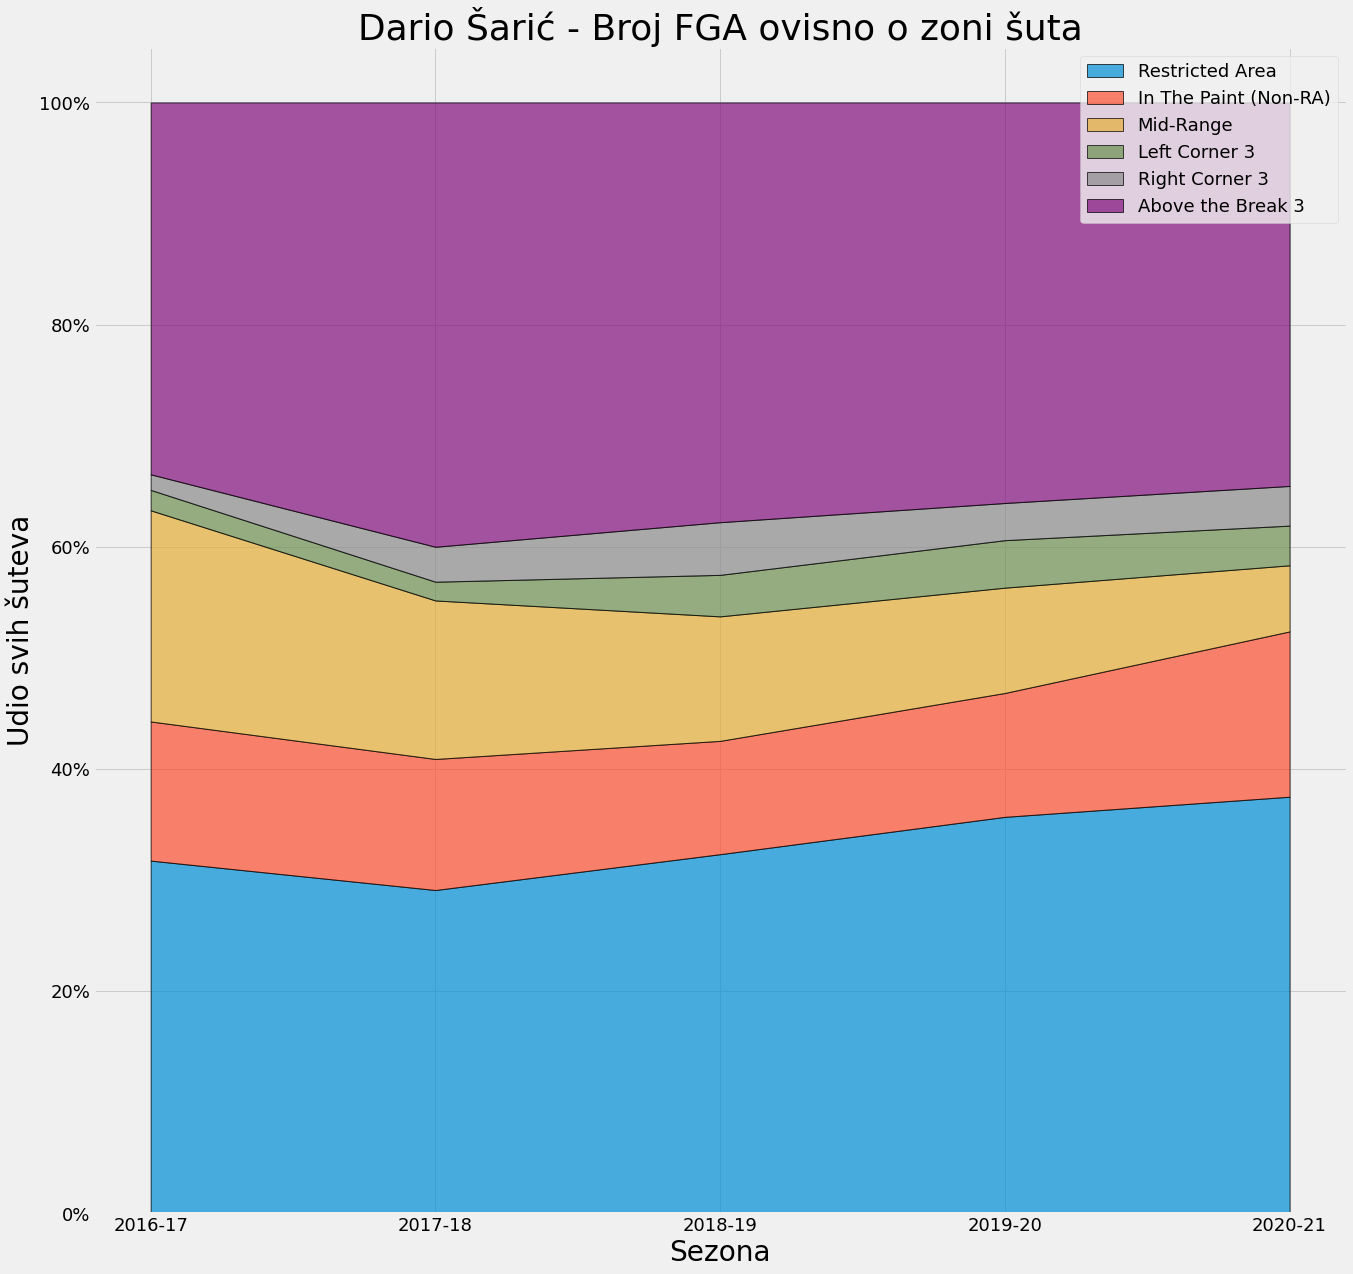

In [28]:
fig, ax = plt.subplots(figsize=(20, 20))

#plt.plot(per_g_seasons, backourt_fga, label=names[6])

ax.stackplot(seasons, *pd.DataFrame(zone_seasons).T.to_numpy(), alpha=0.7, labels=zones, lw=1, edgecolors='black')
#plt.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set_title('Dario Šarić - Broj FGA ovisno o zoni šuta', size=36)
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.set_xticklabels(item[2:] for item in seasons)
ax.set_yticklabels([f"{int(item)}%" for item in ax.get_yticks()])
ax.set_ylabel("Udio svih šuteva", size=28)
ax.legend(fontsize=18)
ax.set_xlabel("Sezona", size=28)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Season')

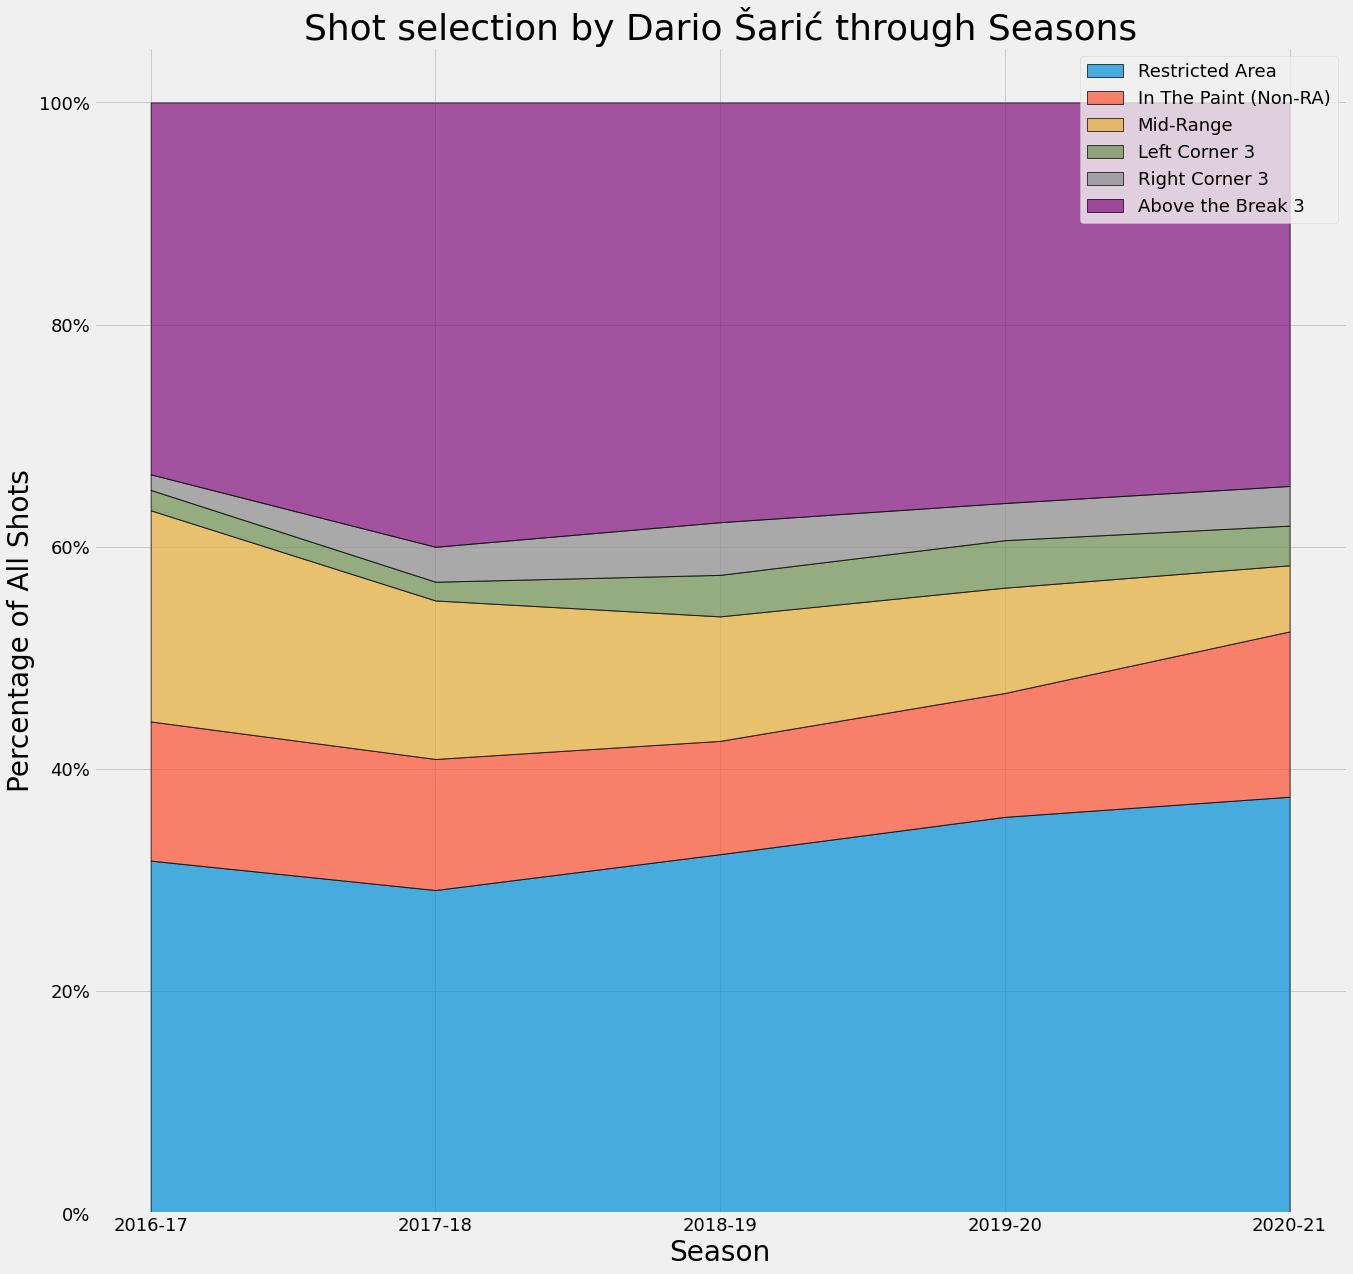

In [86]:
fig, ax = plt.subplots(figsize=(20, 20))

#plt.plot(per_g_seasons, backourt_fga, label=names[6])

ax.stackplot(seasons, *pd.DataFrame(zone_seasons).T.to_numpy(), alpha=0.7, labels=zones, lw=1, edgecolors='black')
#plt.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set_title('Shot selection by Dario Šarić through Seasons', size=36)
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.set_xticklabels(item[2:] for item in seasons)
ax.set_yticklabels([f"{int(item)}%" for item in ax.get_yticks()])
ax.set_ylabel("Percentage of All Shots", size=28)
ax.legend(fontsize=18)
ax.set_xlabel("Season", size=28)

## Play Type choice


In [31]:
play_types = [
    "PRBallHandler",
    "Isolation",
    "Transition",
    "Spotup",
    "Handoff",
    "OffScreen",
    "Cut",
    "OffRebound",
    "Postup",
    "PRRollman",
]

play_types_seasons = {}


    
def download_play_type_data(season='2019-20'):
    
    play_type_dict = {}
    if season not in play_types_seasons:
        print("Retrieving play types...")
        for play in play_types:
            synergy = SynergyPlayTypes(player_or_team_abbreviation='P', play_type_nullable=play, type_grouping_nullable="offensive", per_mode_simple="PerGame", season=season)
            synergy_df = synergy.get_data_frames()[0]
            play_type_dict[play] = synergy_df
            time.sleep(1)
        play_types_seasons[season] = play_type_dict
    else:
        play_type_dict = play_types_seasons[season]

    
    return play_type_dict


In [32]:
def get_interesting_data(df, target_column):
    final_df = None
    for index, play in enumerate(play_types):
        columns = ["PLAYER_NAME", target_column]
        result = df[play].loc[:, columns]
        result = result.rename(columns={target_column: f'{target_column}_{play}'})
        if index == 0:
            final_df = result
        else:
            final_df = pd.merge(left=final_df, right=result, on='PLAYER_NAME', how='outer')
    return final_df


In [33]:
play_data = download_play_type_data('2020-21')

Retrieving play types...


In [34]:
saric_data = []
for season in seasons:
    play_data = download_play_type_data(season)
    cur_season = ['Dario Saric', season]
    multiple_entries = []
    found_multiple = False
    for key in play_data:
        cur_df = play_data[key]
        saric_only = cur_df.loc[cur_df.PLAYER_NAME == 'Dario Saric']
        if len(saric_only) == 0:
            cur_season.append(0.0)
        else:
            saric_only = cur_df.loc[cur_df.PLAYER_NAME == 'Dario Saric']
            
            if len(saric_only) > 1:
                saric_only = saric_only.sort_values(by='GP', ascending=False).iloc[0]
                cur_season.append(saric_only.POSS_PCT * 100)
            else:
                cur_season.append(saric_only.POSS_PCT.iloc[0] * 100)           
    saric_data.append(cur_season)
    #final_data = get_interesting_data(play_data, target_column='POSS').fillna(0.0)
    #final_data.loc[:, 'SEASON'] = season
    #saric_only = final_data.loc[final_data.PLAYER_NAME == 'Dario Saric']
    #saric_data.append(saric_only)

Retrieving play types...
Retrieving play types...
Retrieving play types...
Retrieving play types...


In [35]:
saric_df = pd.DataFrame(saric_data, columns=["PLAYER_NAME", "SEASON"] + list(play_data.keys()))

In [36]:
saric_df.loc[:, 'TOTAL_POSS'] = saric_df.loc[:, saric_df.columns[2:]].sum(axis=1)

In [37]:
for key in saric_df.columns[2:-1]:
    saric_df.loc[:, f"{key}_PCT"] = (saric_df[key] / saric_df.TOTAL_POSS) * 100

In [38]:
saric_df

PLAYER_NAME   SEASON  PRBallHandler  Isolation  Transition  Spotup  \
0  Dario Saric  2016-17            5.1       11.1        15.1    27.2   
1  Dario Saric  2017-18            2.7        3.2        17.3    31.6   
2  Dario Saric  2018-19            0.0        1.9        12.7    31.5   
3  Dario Saric  2019-20            2.8        2.3        11.4    30.9   
4  Dario Saric  2020-21            0.0        0.0         8.0    17.0   

   Handoff  OffScreen   Cut  OffRebound  ...  PRBallHandler_PCT  \
0      1.7        5.1   6.3         5.9  ...           5.351522   
1      3.2        7.4  11.1         6.5  ...           2.827225   
2      1.8        3.9  11.8         7.7  ...           0.000000   
3      1.8        4.0  13.8         6.7  ...           2.975558   
4      0.0        0.0  14.2         0.0  ...           0.000000   

   Isolation_PCT  Transition_PCT  Spotup_PCT  Handoff_PCT  OffScreen_PCT  \
0      11.647429       15.844701   28.541448     1.783841       5.351522   
1       3.350785       18.115183   33.089005     3.350785       7.748691   
2       2.002107       13.382508   33.192835     1.896733       4.109589   
3       2.444208       12.114772   32.837407     1.912859       4.250797   
4       0.000000        9.411765   20.000000     0.000000       0.000000   

     Cut_PCT  OffRebound_PCT  Postup_PCT  PRRollman_PCT  
0   6.610703        6.190976    8.814271       9.863589  
1  11.623037        6.806283    8.376963       4.712042  
2  12.434141        8.113804   11.485774      13.382508  
3  14.665250        7.120085   10.308183      11.370882  
4  16.705882        0.000000   17.764706      36.117647  

[5 rows x 23 columns]

In [39]:
percentages = saric_df.loc[:, saric_df.columns[-10:]]

In [40]:
colors = [
    'tab:blue',
    'tab:red',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'black',
    'teal'
]

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Sezona')

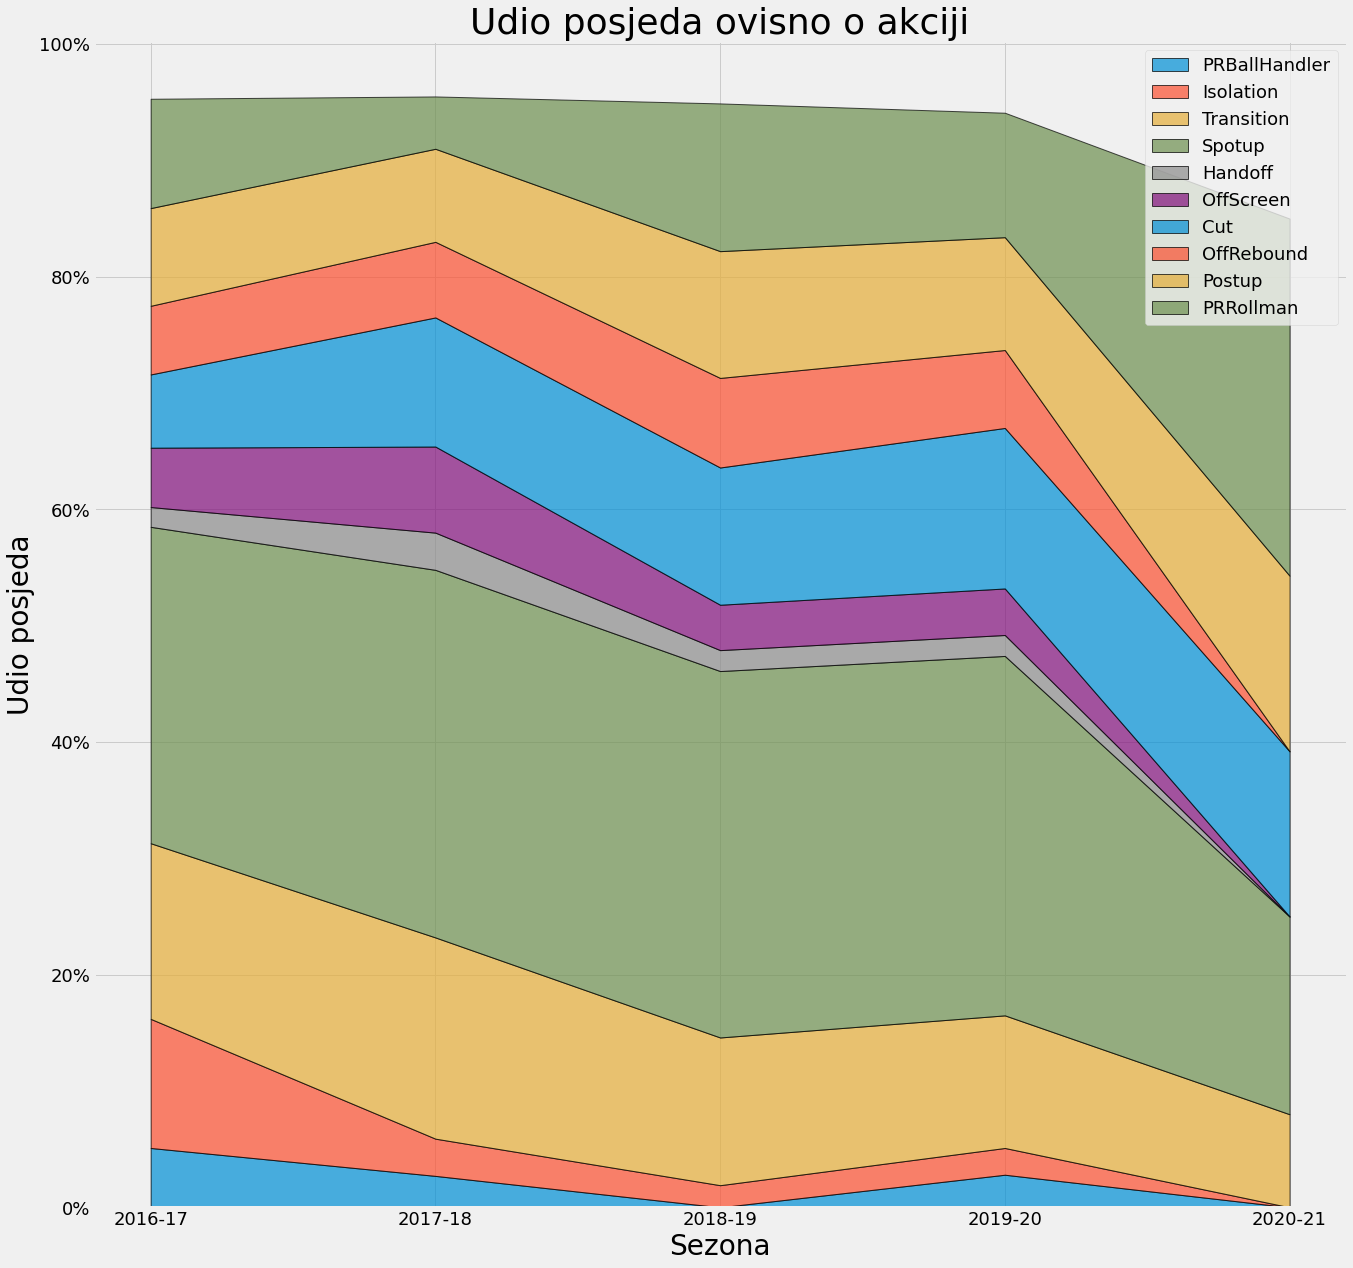

In [80]:
fig, ax = plt.subplots(figsize=(20, 20))

#plt.plot(per_g_seasons, backourt_fga, label=names[6])

ax.stackplot(seasons, *percentages.T.to_numpy(), alpha=0.7, labels=list(play_data.keys()), lw=1, edgecolors='black')
#plt.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set_title('Udio posjeda ovisno o akciji', size=36)
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.set_xticklabels(item[2:] for item in seasons)
ax.set_yticklabels([f"{int(item)}%" for item in ax.get_yticks()])
ax.set_ylabel("Udio posjeda", size=28)
ax.legend(fontsize=18)
ax.set_xlabel("Sezona", size=28)

In [41]:
target_keys = list(saric_df.columns[-10:])

In [42]:
target_keys

['PRBallHandler_PCT',
 'Isolation_PCT',
 'Transition_PCT',
 'Spotup_PCT',
 'Handoff_PCT',
 'OffScreen_PCT',
 'Cut_PCT',
 'OffRebound_PCT',
 'Postup_PCT',
 'PRRollman_PCT']

In [43]:
colormap = plt.get_cmap('PiYG')

In [44]:
cmap_list = sns.blend_palette(colors=["#8C1D04", "#FFFFFF","#16872A"],n_colors=10, as_cmap=False)

In [45]:
def get_color(value):
    return value // 4

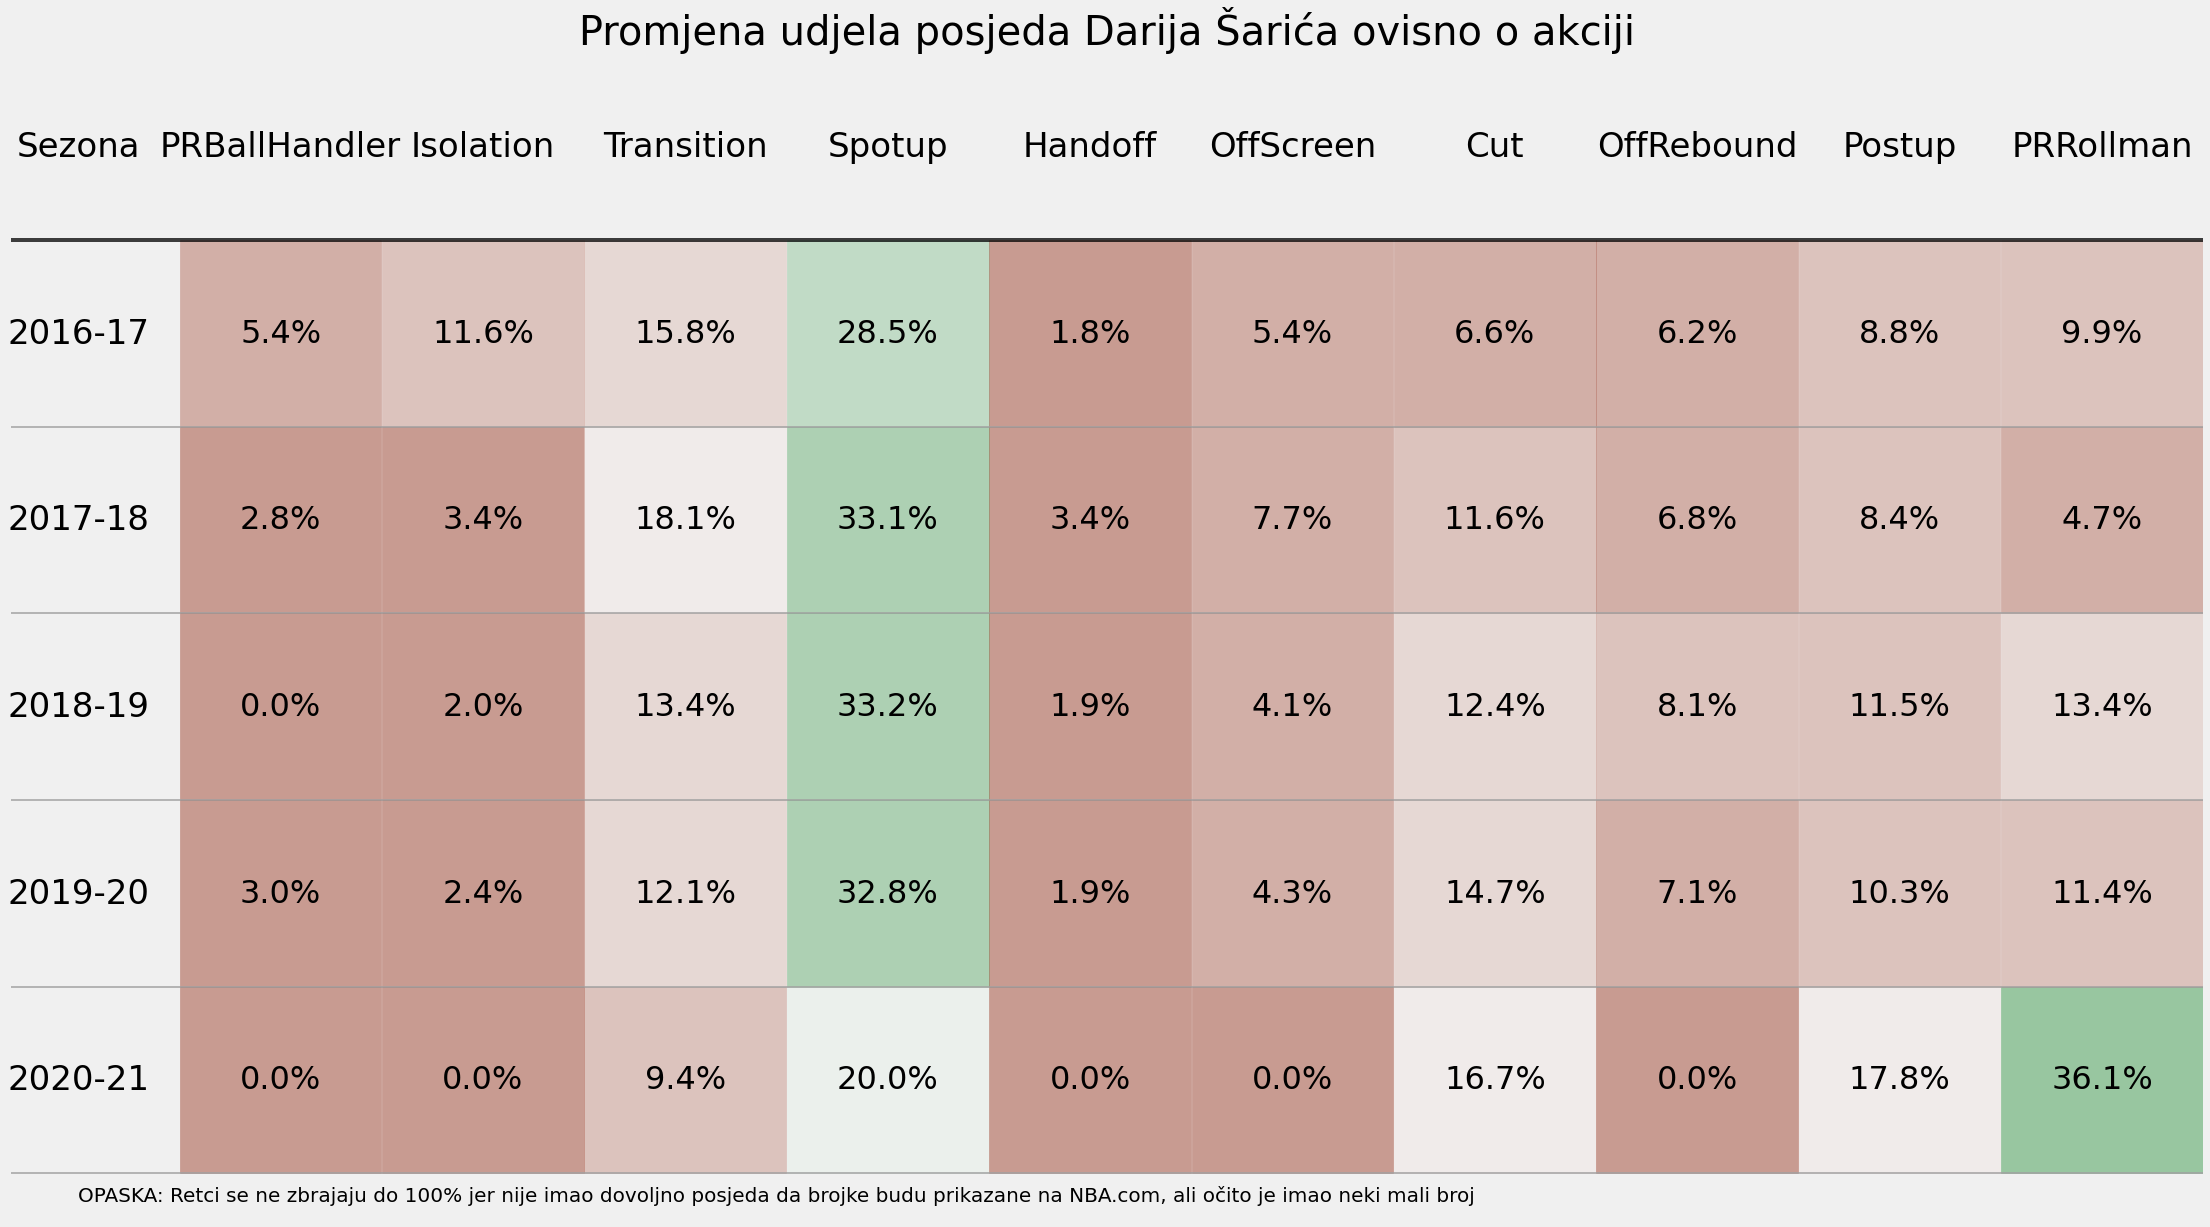

In [46]:
fig, ax = plt.subplots(figsize=(35, 20))
font_size = 32
font_title = 34
top = len(saric_df)
xmax = 6.5

for i in range(top):
    item = saric_df.iloc[i]
    y_coord = top - i - 1
    #if (i-1) % 2 == 1:
    #    color = '#EAE8E8'
    #    rect = Rectangle((-0.5, y_coord - 0.5), width=20, height=1, fill=True, color=color)
    #    ax.add_patch(rect)
    ax.text(x=0.2, y=y_coord, ha='center', va='center', s=item.SEASON, size=font_title)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#A0A0A0', alpha=0.75, lw=2)
    
    
    for index, key in enumerate(target_keys):
        color = cmap_list[get_color(int(item[key]))]
        rect = Rectangle((0.8 + index * 0.6 - 0.299, y_coord - 0.5), width=0.598, height=1, fill=True, color=color, alpha=0.4)
        ax.add_patch(rect)
        ax.text(x=0.8 + index * 0.6, y=y_coord, ha='center', va='center', s=f"{item[key]:.1f}%", size=font_size)
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
ax.text(x=0.2, y=top, s='Sezona', ha='center', va='center', size=font_title)
for index, key in enumerate(target_keys):
    ax.text(x=0.8 + index * 0.6, y=top, ha='center', va='center', s=key.split("_PCT")[0], size=font_title)

#ax.text(x=4, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=20)
#ax.text(x=0, y=-0.75, s='data: nba.com', ha='left', va='center', size=20)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, color='black', alpha=0.75, lw=4)
ax.set_title("Promjena udjela posjeda Darija Šarića ovisno o akciji", size=40)
#ax.text(x=0.2, y=-0.65, s="NOTE: Rows don't add up to 100% because he wasn't qualified for some actions but obviously had some possesions in them", size=20)
ax.text(x=0.2, y=-0.65, s="OPASKA: Retci se ne zbrajaju do 100% jer nije imao dovoljno posjeda da brojke budu prikazane na NBA.com, ali očito je imao neki mali broj", size=20)
    
ax.set_ylim(bottom=-0.75, top=top+0.5)
ax.set_xlim(left=0, right=xmax)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('slika.png', dpi=120, bbox_inches='tight')

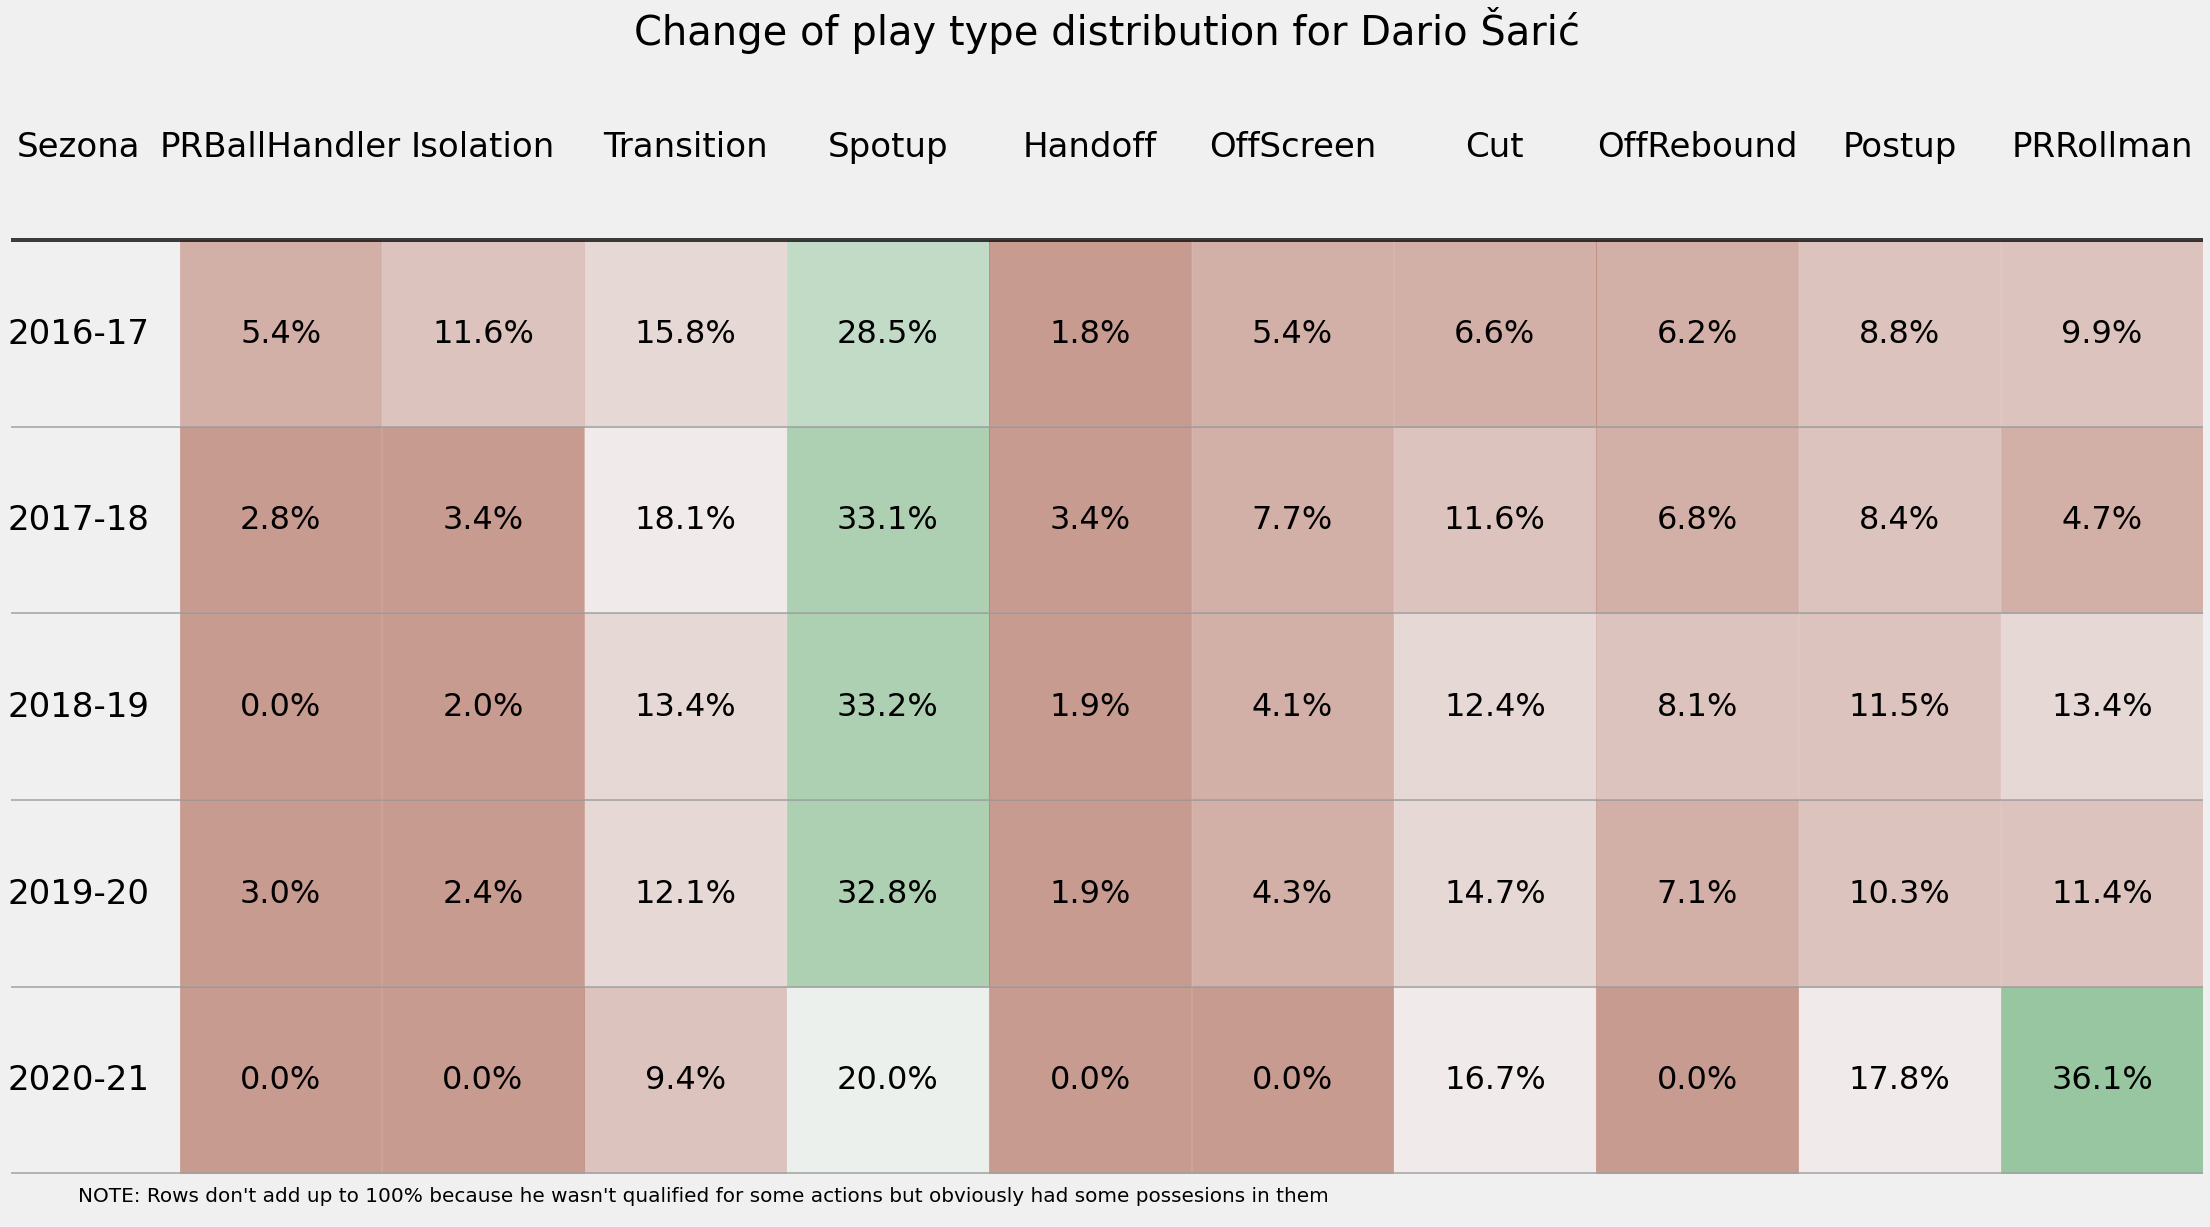

In [47]:
fig, ax = plt.subplots(figsize=(35, 20))
font_size = 32
font_title = 34
top = len(saric_df)
xmax = 6.5

for i in range(top):
    item = saric_df.iloc[i]
    y_coord = top - i - 1
    #if (i-1) % 2 == 1:
    #    color = '#EAE8E8'
    #    rect = Rectangle((-0.5, y_coord - 0.5), width=20, height=1, fill=True, color=color)
    #    ax.add_patch(rect)
    ax.text(x=0.2, y=y_coord, ha='center', va='center', s=item.SEASON, size=font_title)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#A0A0A0', alpha=0.75, lw=2)
    
    
    for index, key in enumerate(target_keys):
        color = cmap_list[get_color(int(item[key]))]
        rect = Rectangle((0.8 + index * 0.6 - 0.299, y_coord - 0.5), width=0.598, height=1, fill=True, color=color, alpha=0.4)
        ax.add_patch(rect)
        ax.text(x=0.8 + index * 0.6, y=y_coord, ha='center', va='center', s=f"{item[key]:.1f}%", size=font_size)
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
ax.text(x=0.2, y=top, s='Sezona', ha='center', va='center', size=font_title)
for index, key in enumerate(target_keys):
    ax.text(x=0.8 + index * 0.6, y=top, ha='center', va='center', s=key.split("_PCT")[0], size=font_title)

#ax.text(x=4, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=20)
#ax.text(x=0, y=-0.75, s='data: nba.com', ha='left', va='center', size=20)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, color='black', alpha=0.75, lw=4)
ax.set_title("Change of play type distribution for Dario Šarić", size=40)
ax.text(x=0.2, y=-0.65, s="NOTE: Rows don't add up to 100% because he wasn't qualified for some actions but obviously had some possesions in them", size=20)
#ax.text(x=0.2, y=-0.65, s="OPASKA: Retci se ne zbrajaju do 100% jer nije imao dovoljno posjeda da brojke budu prikazane na NBA.com, ali očito je imao neki mali broj", size=20)
    
ax.set_ylim(bottom=-0.75, top=top+0.5)
ax.set_xlim(left=0, right=xmax)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('slika.png', dpi=120, bbox_inches='tight')

### PPP PnR vs Postup

* faces chart

* Usage/TS for SheShe through years

In [48]:
play_data = download_play_type_data('2020-21')

In [49]:
play_data.keys()

dict_keys(['PRBallHandler', 'Isolation', 'Transition', 'Spotup', 'Handoff', 'OffScreen', 'Cut', 'OffRebound', 'Postup', 'PRRollman'])

In [50]:
postup = play_data['Postup']
pnr = play_data['PRRollman']

In [51]:
merged_df = pd.merge(left=postup, right=pnr, on=('PLAYER_ID', 'PLAYER_NAME'), suffixes=('_POSTUP', '_PNR'))

In [52]:
merged_df.loc[:, 'TOTAL_POSS'] = merged_df.POSS_POSTUP + merged_df.POSS_PNR

In [53]:
top_50 = merged_df.sort_values(by='TOTAL_POSS', ascending=False).iloc[:35]

In [54]:
player_root_dir = 'player_imgs'

In [55]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(player_id, zoom=1.0):
    #print(path)
    return OffsetImage(plt.imread(f"{player_root_dir}/{player_id}.png"), zoom=zoom)


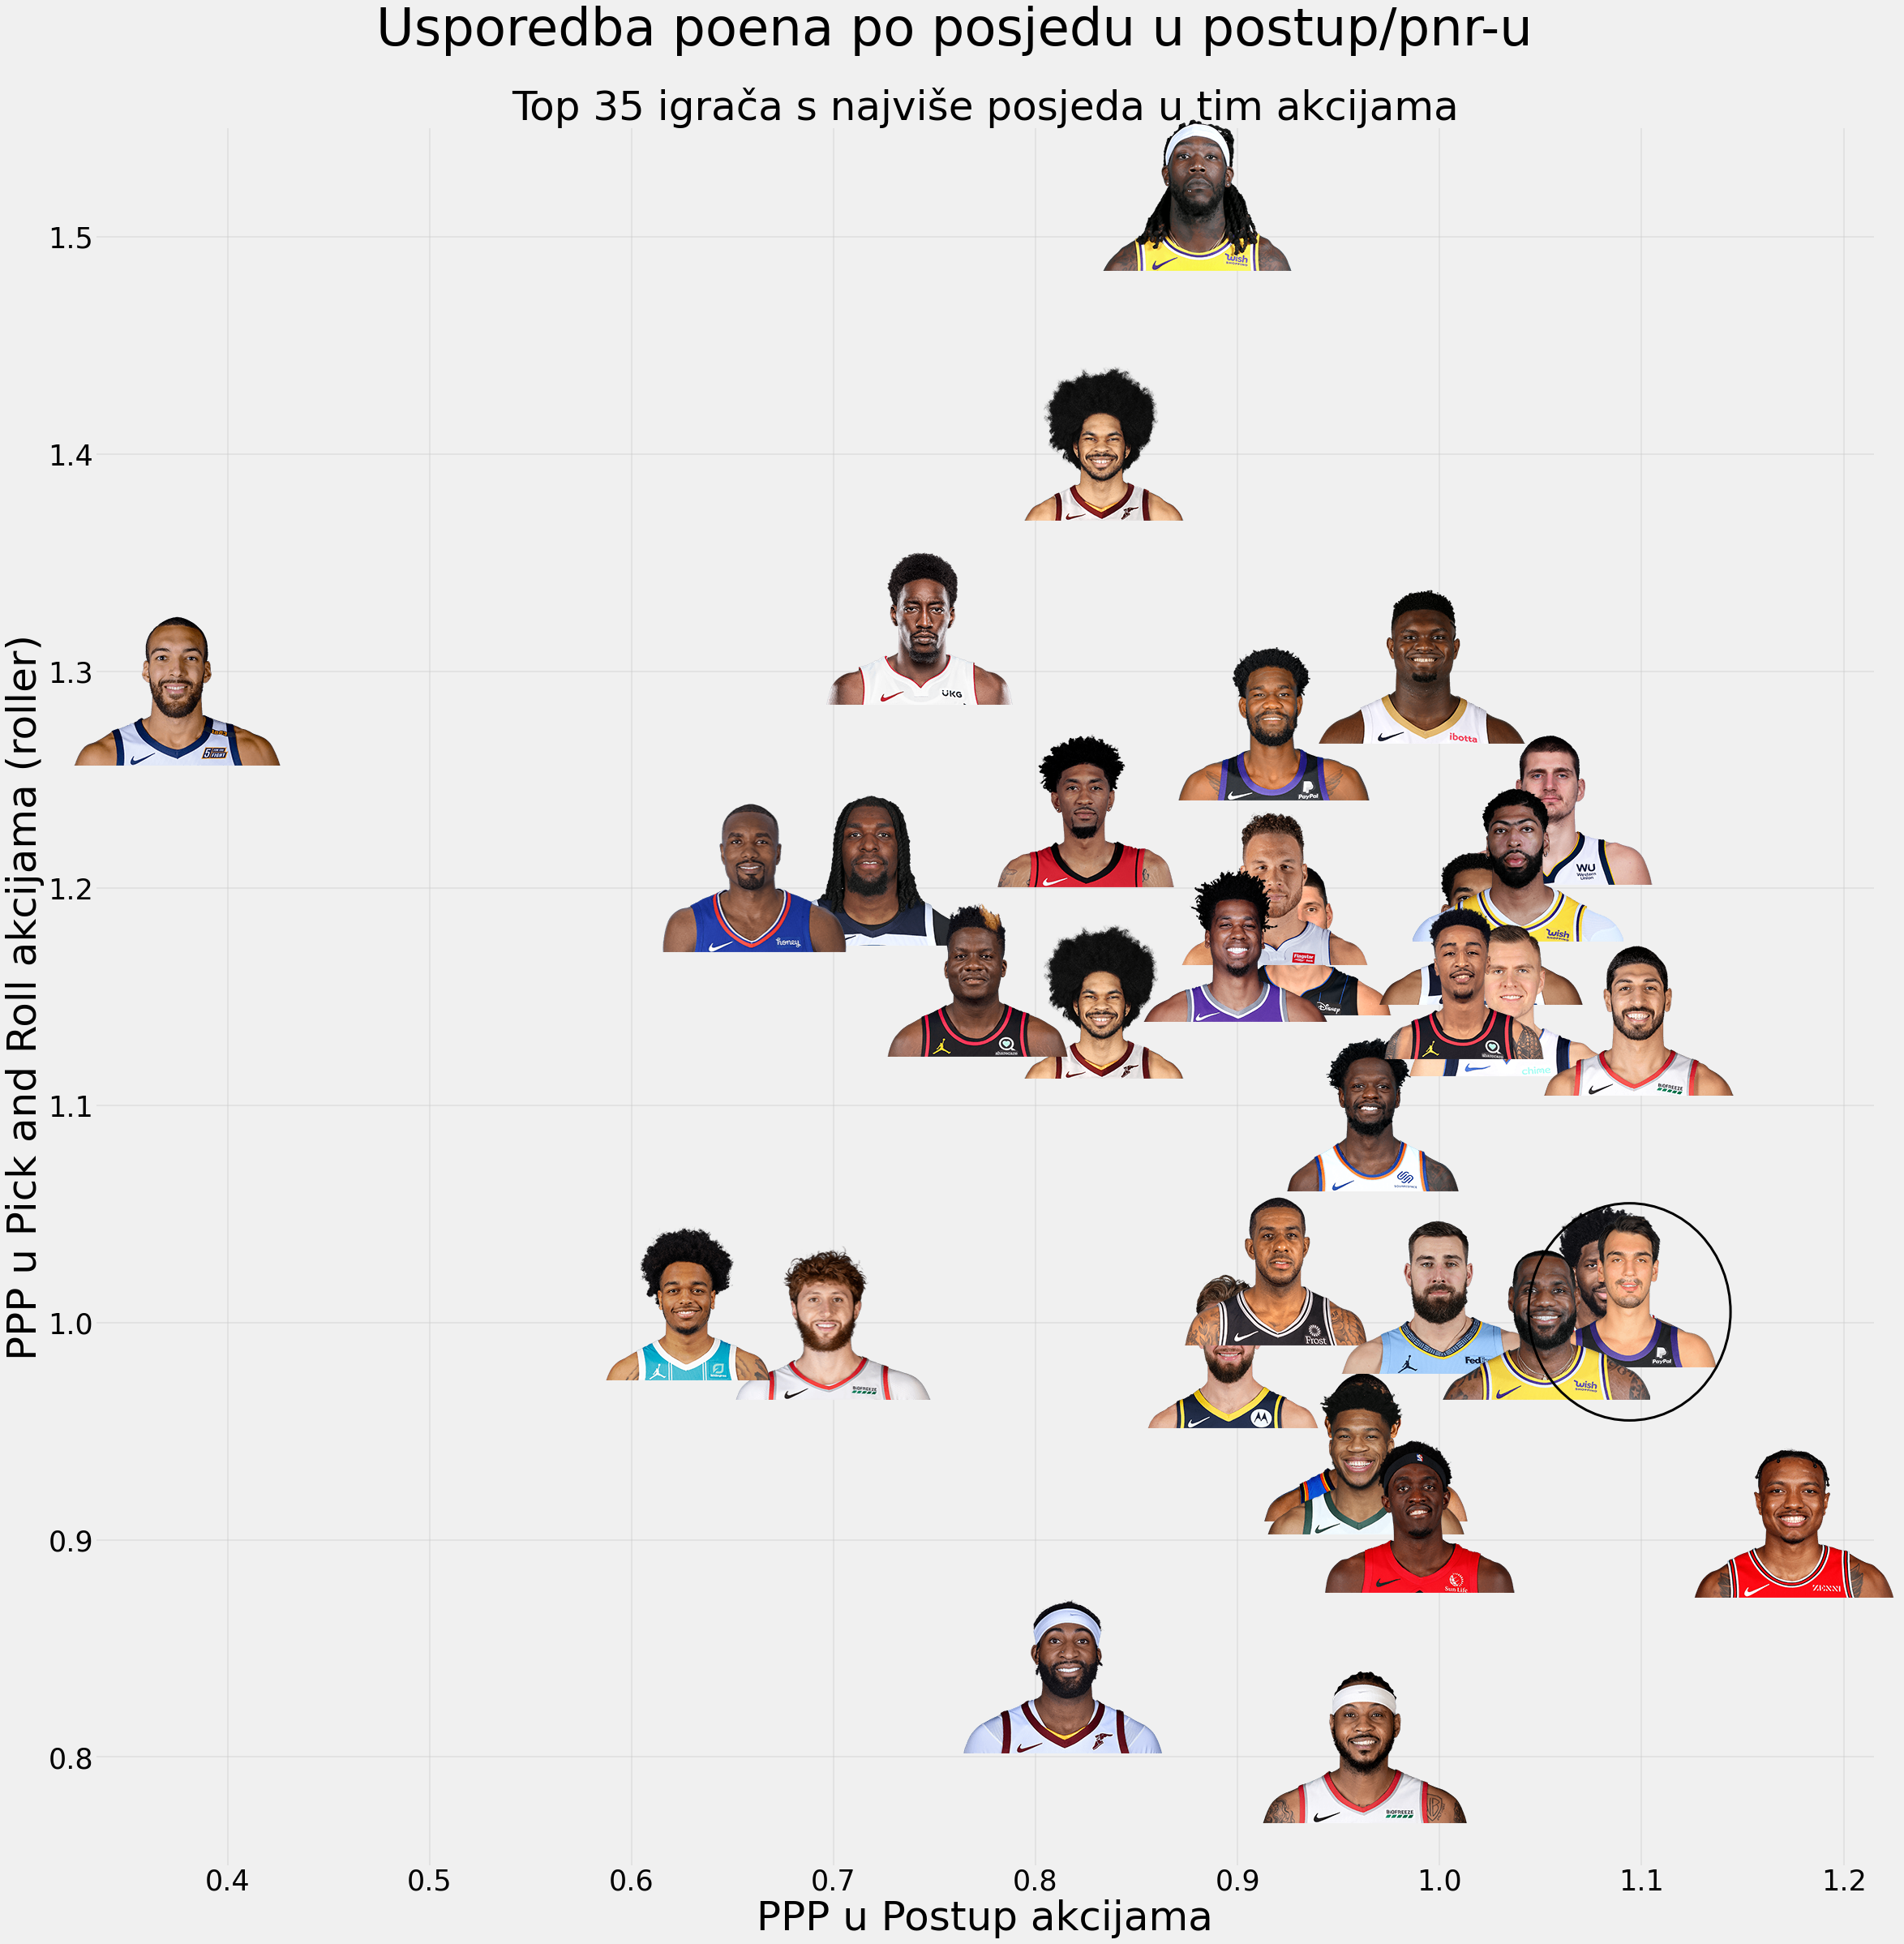

In [56]:
fig, ax = plt.subplots(figsize=(35, 35))
x = top_50.PPP_POSTUP.tolist()
y = top_50.PPP_PNR.tolist()
ax.scatter(x, y) 
ax.tick_params(labelsize=35)
ax.set_xlabel("PPP u Postup akcijama", size=50)
ax.set_ylabel("PPP u Pick and Roll akcijama (roller)", size=50)
plt.suptitle("Usporedba poena po posjedu u postup/pnr-u", size=64)
ax.set_title("Top 35 igrača s najviše posjeda u tim akcijama", size=50, ha='center')
ax.set_ylim(0.75, 1.55)
#ax.set_xlim(-0.1, 10.1)
ax.grid(b=True, alpha=0.5, lw=1.5)

for x0, y0, player_id in zip(x, y, top_50.PLAYER_ID.tolist()):
    if player_id == saric_id:
        ab = AnnotationBbox(getImage(player_id), (x0, y0), frameon=False, pad=0.0)
        circle = Circle((x0, y0-0.01), radius=0.05, linewidth=3, color='black', fill=False, zorder=6)
        ax.add_patch(circle)
    else:
        ab = AnnotationBbox(getImage(player_id), (x0, y0), frameon=False, pad=0.0)
    ax.add_artist(ab)
    
fig.subplots_adjust(top=0.92)
#ax.title.set_position([.5, 1.15])
ax.set_frame_on(False)

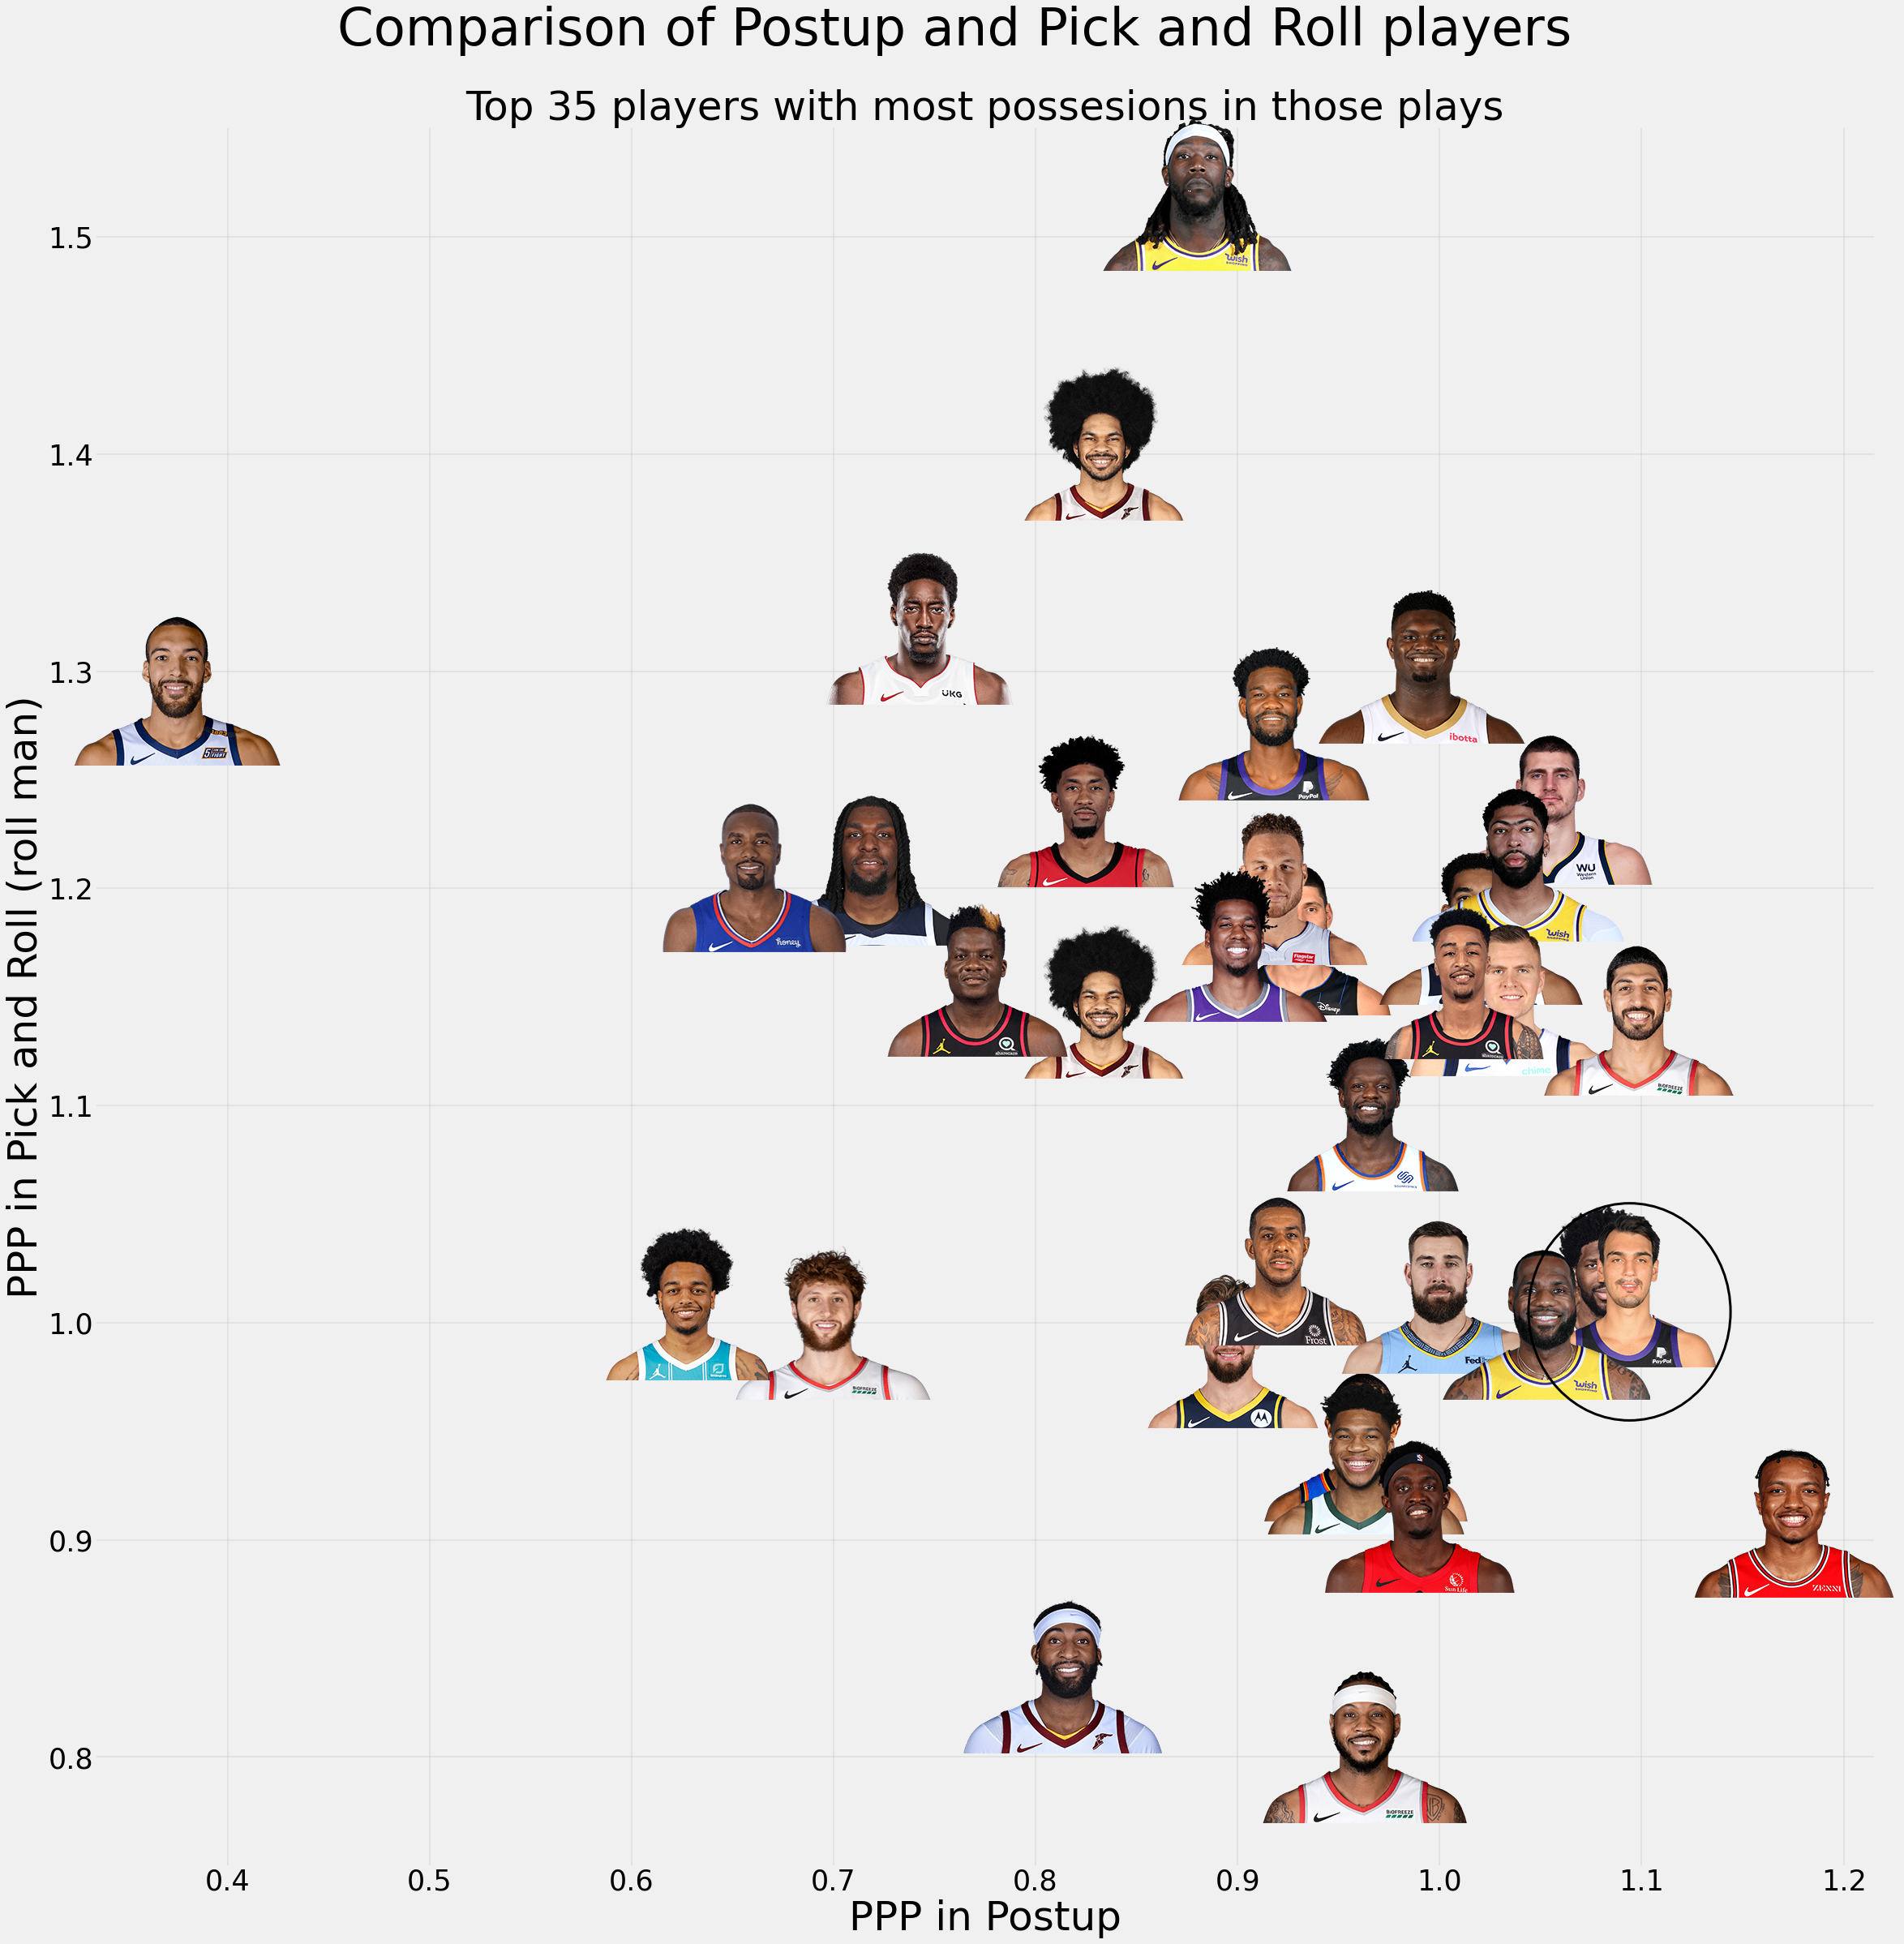

In [58]:
fig, ax = plt.subplots(figsize=(35, 35))
x = top_50.PPP_POSTUP.tolist()
y = top_50.PPP_PNR.tolist()
ax.scatter(x, y) 
ax.tick_params(labelsize=35)
ax.set_xlabel("PPP in Postup", size=50)
ax.set_ylabel("PPP in Pick and Roll (roll man)", size=50)
plt.suptitle("Comparison of Postup and Pick and Roll players", size=64)
ax.set_title("Top 35 players with most possesions in those plays", size=50, ha='center')
ax.set_ylim(0.75, 1.55)
#ax.set_xlim(-0.1, 10.1)
ax.grid(b=True, alpha=0.5, lw=1.5)

for x0, y0, player_id in zip(x, y, top_50.PLAYER_ID.tolist()):
    if player_id == saric_id:
        ab = AnnotationBbox(getImage(player_id), (x0, y0), frameon=False, pad=0.0)
        circle = Circle((x0, y0-0.01), radius=0.05, linewidth=3, color='black', fill=False, zorder=6)
        ax.add_patch(circle)
    else:
        ab = AnnotationBbox(getImage(player_id), (x0, y0), frameon=False, pad=0.0)
    ax.add_artist(ab)
    
fig.subplots_adjust(top=0.92)
#ax.title.set_position([.5, 1.15])
ax.set_frame_on(False)

### Net Rating she she

In [59]:
from nba_api.stats.endpoints.teamplayeronoffsummary import TeamPlayerOnOffSummary

from nba_api.stats.static.teams import get_teams

In [60]:
total_dfs = []
for team in get_teams():
    team_id = team['id']
    team_summary = TeamPlayerOnOffSummary(team_id=team_id, measure_type_detailed_defense='Base')
    on_court = team_summary.get_data_frames()[1]
    off_court = team_summary.get_data_frames()[2]
    merge_columns = ['TEAM_ID', 'TEAM_NAME', 'VS_PLAYER_ID', 'VS_PLAYER_NAME']
    columns = merge_columns + ['GP', 'MIN', 'PLUS_MINUS', 'OFF_RATING', 'DEF_RATING', 'NET_RATING']

    merged_df = pd.merge(left=on_court, right=off_court, on=merge_columns, suffixes=('_ON', '_OFF'))
    total_dfs.append(merged_df)
    time.sleep(0.2)

In [61]:
full_df = pd.concat(total_dfs)

In [62]:
full_df.loc[:, 'MIN_G'] = full_df.MIN_ON / full_df.GP_ON
full_df = full_df.loc[full_df.GP_ON > 10]

In [63]:
top_260 = full_df.sort_values('MIN_G', ascending=False).iloc[:260]

In [64]:
saric_only = top_260.loc[top_260.VS_PLAYER_ID == saric_id]

In [65]:
adv_stats = LeagueDashPlayerStats(season='2020-21', measure_type_detailed_defense='Advanced').get_data_frames()[0]

bench_players = LeagueDashPlayerStats(season='2020-21', measure_type_detailed_defense='Advanced', starter_bench_nullable='Bench').get_data_frames()[0]


In [66]:
bench_merge = pd.merge(left=adv_stats, right=bench_players, on=('PLAYER_ID', 'PLAYER_NAME'), suffixes=('_ALL', '_BENCH'))

bench_merge.loc[:, 'BENCH_RATIO'] = bench_merge.GP_BENCH / bench_merge.GP_ALL

bench_merge = bench_merge.loc[(bench_merge.MIN_ALL > 10) & (bench_merge.GP_BENCH > 15)]

bench_merge = bench_merge.loc[bench_merge.BENCH_RATIO > 0.75]

bench_merge.sort_values(by='USG_PCT_BENCH', ascending=False)

final_bench_players = bench_merge.sort_values(by='USG_PCT_BENCH', ascending=False).iloc[:15]

In [67]:
#bench_players = bench_players.loc[(bench_players.MIN > 10) & (bench_players.GP > 15)]
#important_bench_players = bench_players.sort_values(by='USG_PCT', ascending=False).iloc[:15]

In [68]:
target_bench = top_260.loc[(top_260.VS_PLAYER_ID.isin(final_bench_players.PLAYER_ID.tolist())) & (top_260.TEAM_ABBREVIATION_ON != 'PHX')]

In [69]:
other = top_260.loc[~top_260.VS_PLAYER_ID.isin(target_bench.VS_PLAYER_ID.tolist() + saric_only.VS_PLAYER_ID.tolist())]

149

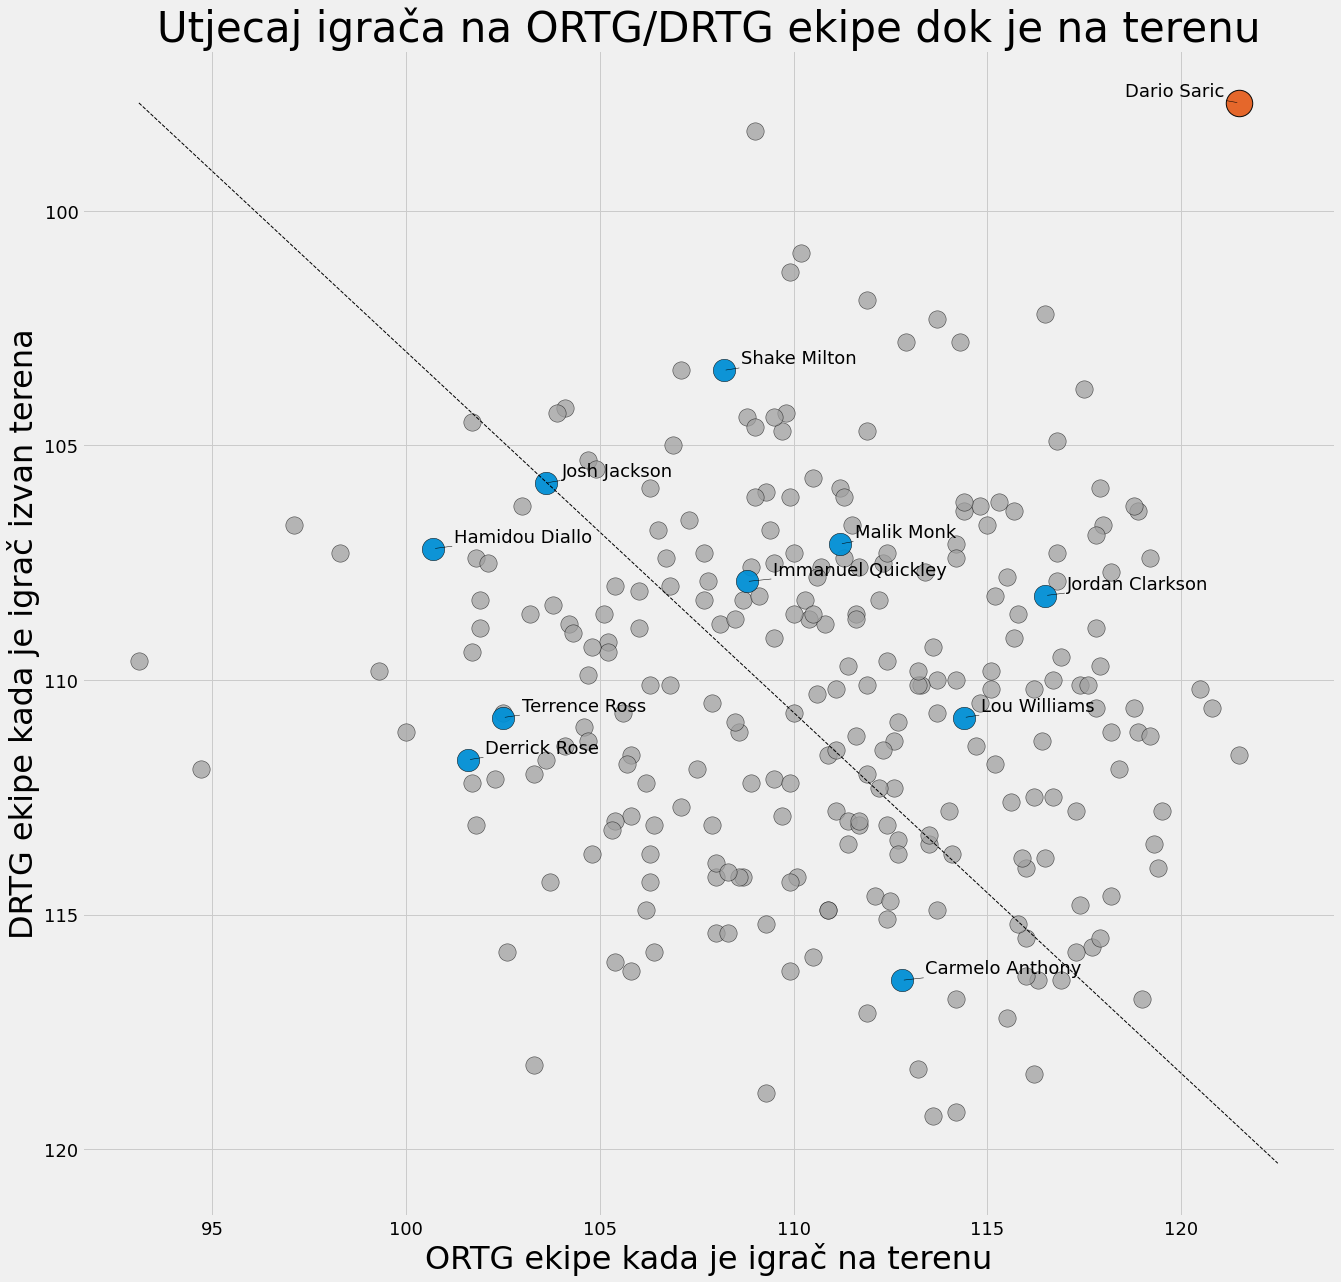

In [70]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other.OFF_RATING_ON, y=other.DEF_RATING_ON, s=300, color='#A0A0A0', alpha=0.75, edgecolors='black', label='ostali')
ax.scatter(x=target_bench.OFF_RATING_ON, y=target_bench.DEF_RATING_ON, s=500, alpha=0.95, edgecolors='black', label='Značajni bench igrači')
ax.scatter(x=saric_only.OFF_RATING_ON, y=saric_only.DEF_RATING_ON, s=700, alpha=0.95, color=suns_primary, edgecolors='black', lw=1.0, label='Šiši')

texts = []
for index in range(len(saric_only)):
    item = saric_only.iloc[index]
    name = item.VS_PLAYER_NAME
    texts.append(ax.text(x=item.OFF_RATING_ON, y=item.DEF_RATING_ON, s=f"{name.split(', ')[1]} {name.split(', ')[0]}", size=18))
                         
for index in range(len(target_bench)):
    item = target_bench.iloc[index]
    name = item.VS_PLAYER_NAME
    texts.append(ax.text(x=item.OFF_RATING_ON, y=item.DEF_RATING_ON, s=f"{name.split(', ')[1]} {name.split(', ')[0]}", size=18))

ax.set_xlabel("ORTG ekipe kada je igrač na terenu", size=32)
ax.set_ylabel("DRTG ekipe kada je igrač izvan terena", size=32)
ax.set_title("Utjecaj igrača na ORTG/DRTG ekipe dok je na terenu", size=42)
ax.tick_params(labelsize=18)
                         
ax.plot(
    np.linspace(top_260.OFF_RATING_ON.min(), top_260.OFF_RATING_ON.max()+1, 20),
    np.linspace(top_260.DEF_RATING_ON.min(), top_260.DEF_RATING_ON.max()+1, 20),
    color='black',
    lw=1,
    ls='--'
)                         
ax.invert_yaxis()
    
#ax.invert_yaxis()
#ax.invert_xaxis()
adjust_text(texts, expand_points=(1.3, 1.3), arrowprops={'arrowstyle': '-', 'color': 'black'})

149

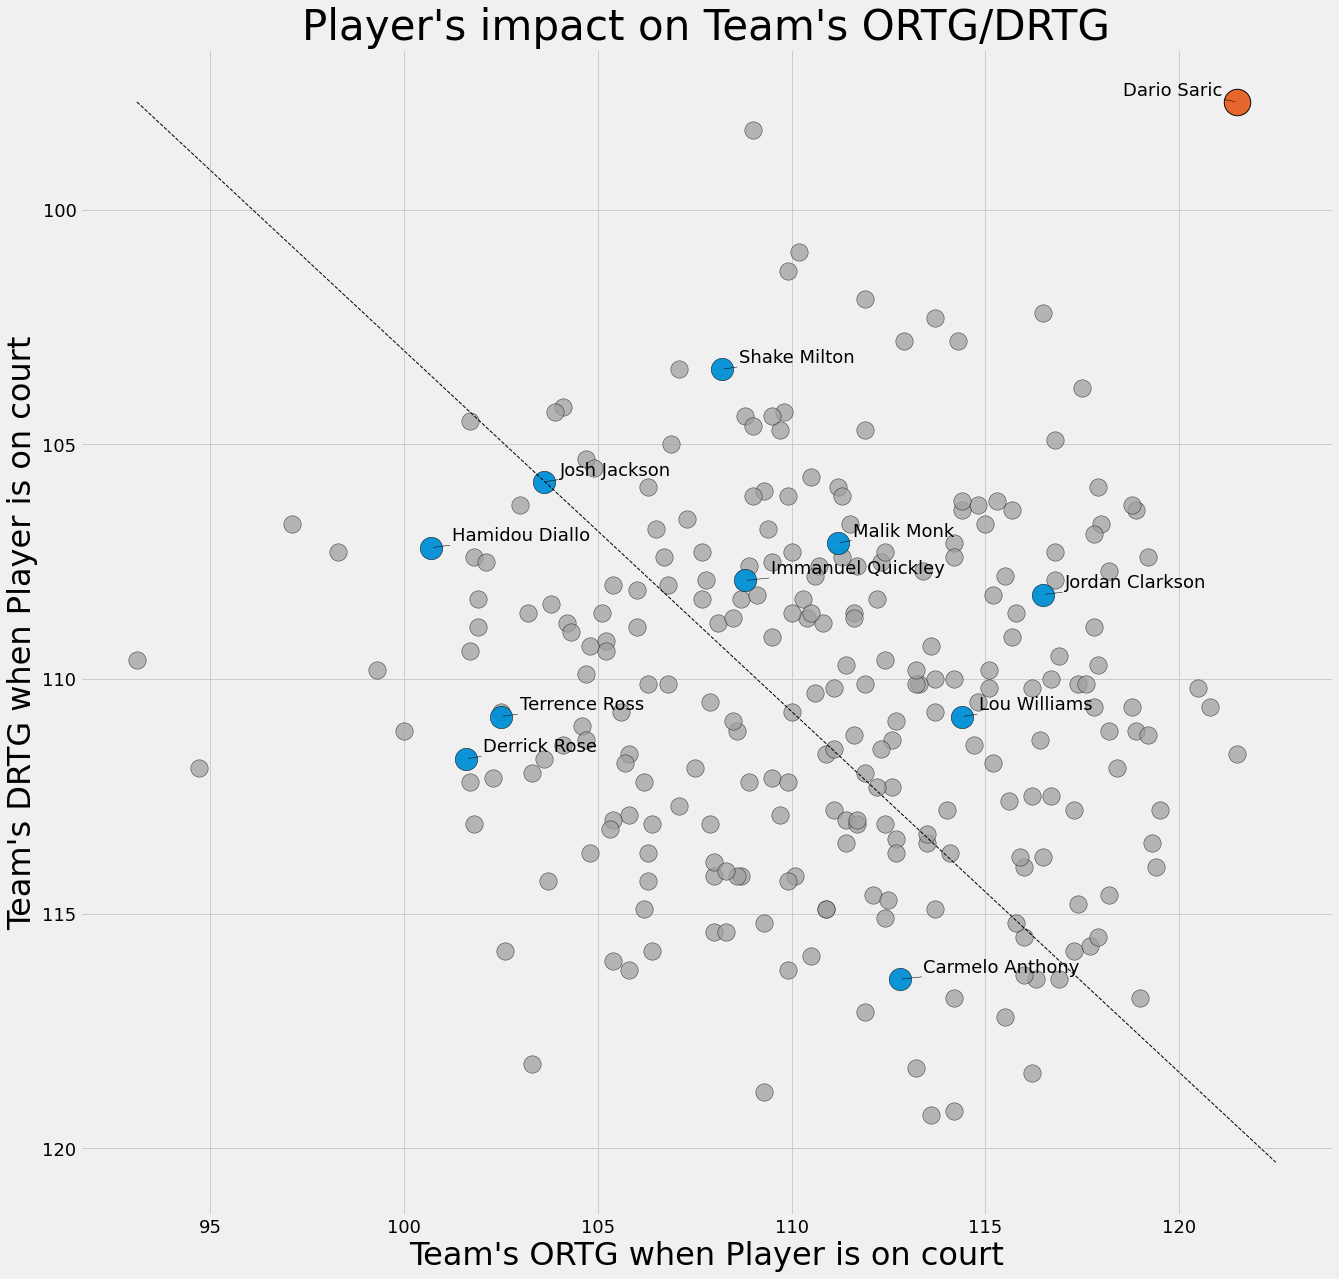

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other.OFF_RATING_ON, y=other.DEF_RATING_ON, s=300, color='#A0A0A0', alpha=0.75, edgecolors='black', label='ostali')
ax.scatter(x=target_bench.OFF_RATING_ON, y=target_bench.DEF_RATING_ON, s=500, alpha=0.95, edgecolors='black', label='Značajni bench igrači')
ax.scatter(x=saric_only.OFF_RATING_ON, y=saric_only.DEF_RATING_ON, s=700, alpha=0.95, color=suns_primary, edgecolors='black', lw=1.0, label='Šiši')

texts = []
for index in range(len(saric_only)):
    item = saric_only.iloc[index]
    name = item.VS_PLAYER_NAME
    texts.append(ax.text(x=item.OFF_RATING_ON, y=item.DEF_RATING_ON, s=f"{name.split(', ')[1]} {name.split(', ')[0]}", size=18))
                         
for index in range(len(target_bench)):
    item = target_bench.iloc[index]
    name = item.VS_PLAYER_NAME
    texts.append(ax.text(x=item.OFF_RATING_ON, y=item.DEF_RATING_ON, s=f"{name.split(', ')[1]} {name.split(', ')[0]}", size=18))

ax.set_xlabel("Team's ORTG when Player is on court", size=32)
ax.set_ylabel("Team's DRTG when Player is on court", size=32)
ax.set_title("Player's impact on Team's ORTG/DRTG", size=42)
ax.tick_params(labelsize=18)
                         
ax.plot(
    np.linspace(top_260.OFF_RATING_ON.min(), top_260.OFF_RATING_ON.max()+1, 20),
    np.linspace(top_260.DEF_RATING_ON.min(), top_260.DEF_RATING_ON.max()+1, 20),
    color='black',
    lw=1,
    ls='--'
)                         
ax.invert_yaxis()
    
#ax.invert_yaxis()
#ax.invert_xaxis()
adjust_text(texts, expand_points=(1.3, 1.3), arrowprops={'arrowstyle': '-', 'color': 'black'})

### Diff in usage

In [72]:
cur_year = LeagueDashPlayerStats(season='2020-21', measure_type_detailed_defense='Advanced').get_data_frames()[0]

In [73]:
past_year = LeagueDashPlayerStats(season='2019-20', measure_type_detailed_defense='Advanced').get_data_frames()[0]

In [74]:
cur_year.loc[:, 'USG_PCT'] = cur_year.USG_PCT * 100
cur_year.loc[:, 'TS_PCT'] = cur_year.TS_PCT * 100
past_year.loc[:, 'USG_PCT'] = past_year.USG_PCT * 100
past_year.loc[:, 'TS_PCT'] = past_year.TS_PCT * 100

In [75]:
merged_df = pd.merge(left=past_year, right=cur_year, on=['PLAYER_ID', 'PLAYER_NAME'], suffixes=('_LAST', '_CUR'))

In [76]:
merged_df.loc[:, 'USG_DIFF'] = merged_df.USG_PCT_CUR - merged_df.USG_PCT_LAST
merged_df.loc[:, 'TS_DIFF'] = merged_df.TS_PCT_CUR - merged_df.TS_PCT_LAST

In [77]:
qualified = merged_df.loc[(merged_df.MIN_CUR > 15) & (merged_df.GP_CUR > 10) & (merged_df.GP_LAST > 10)]

In [78]:
top_usg_growth = qualified.sort_values(by='USG_DIFF', ascending=False).iloc[:7]

In [79]:
top_ts_growth = qualified.sort_values(by='TS_DIFF', ascending=False).iloc[:5]

In [80]:
saric_qualy = qualified.loc[qualified.PLAYER_ID == saric_id]
top_usg_growth = top_usg_growth.loc[top_usg_growth.PLAYER_ID != saric_id]
top_ts_growth = top_ts_growth.loc[top_ts_growth.PLAYER_ID != saric_id]

In [81]:
player_ids = top_ts_growth.PLAYER_ID.tolist() + top_usg_growth.PLAYER_ID.tolist() + saric_qualy.PLAYER_ID.tolist()

In [82]:
other = qualified.loc[~qualified.PLAYER_ID.isin(player_ids)]

In [83]:
growth_top = pd.concat([top_ts_growth, top_usg_growth])

14

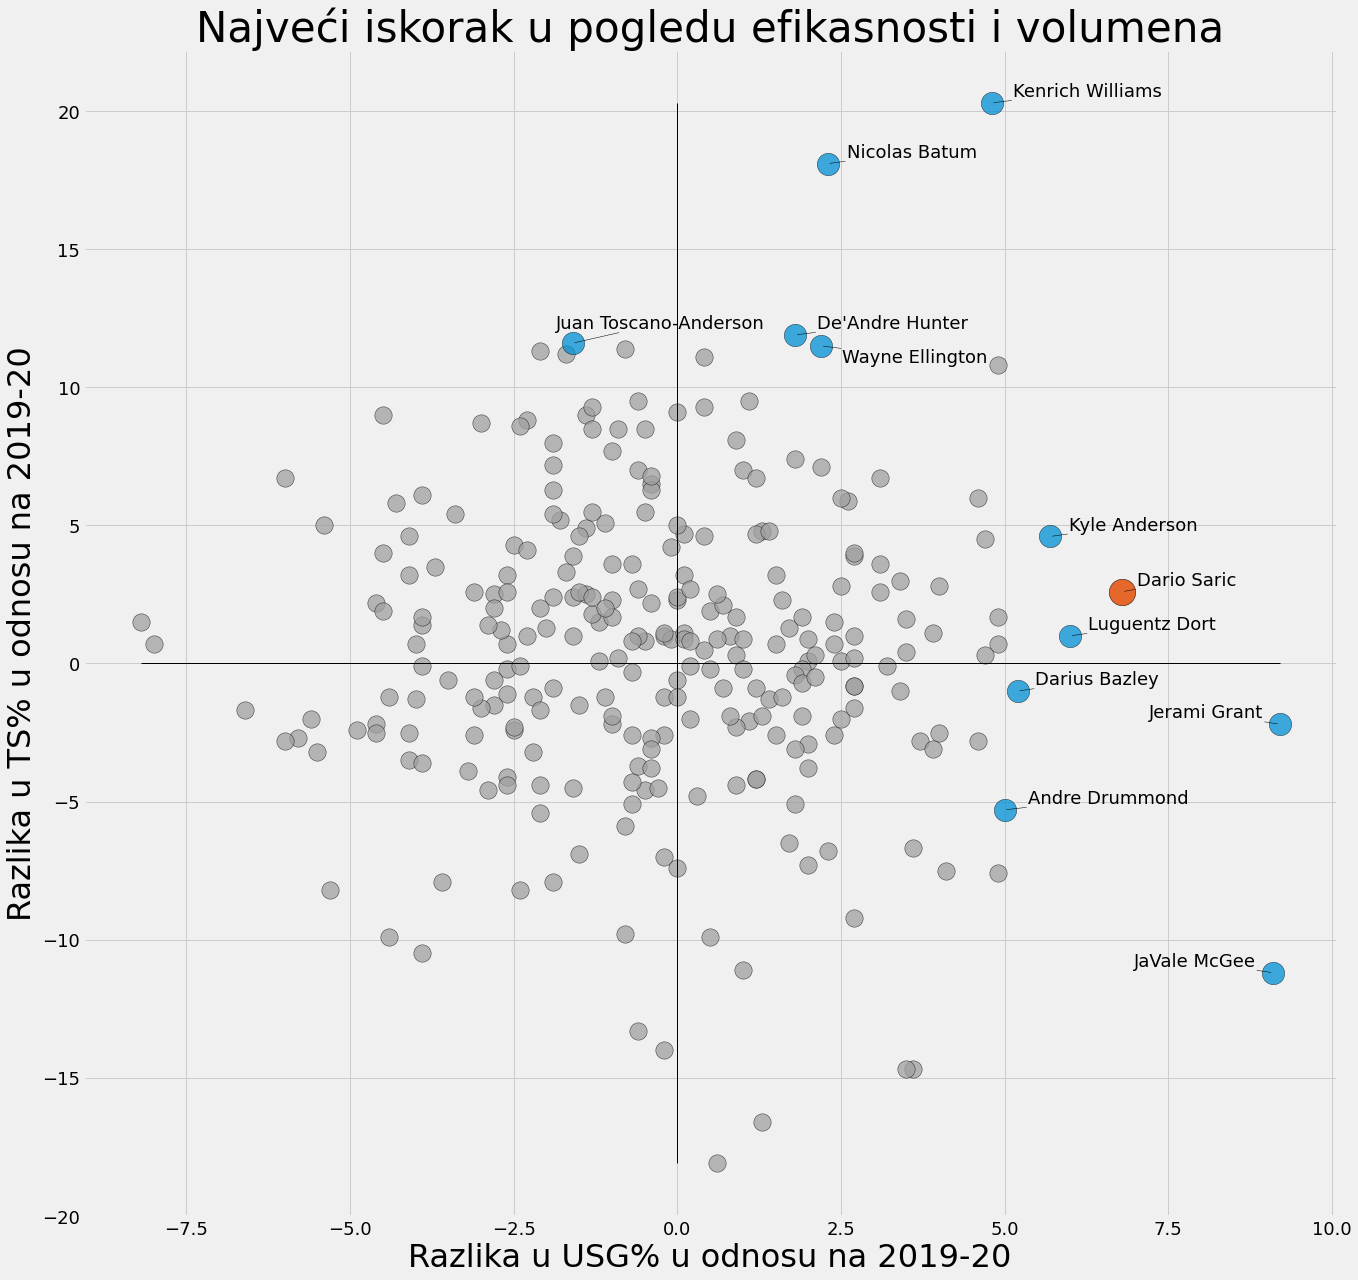

In [84]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.hlines(y=0, xmin=qualified.USG_DIFF.min(), xmax=qualified.USG_DIFF.max(), lw=1, color='black')
ax.vlines(x=0, ymin=qualified.TS_DIFF.min(), ymax=qualified.TS_DIFF.max(), lw=1, color='black')
ax.scatter(x=other.USG_DIFF, y=other.TS_DIFF, s=300, color='#A0A0A0', alpha=0.75, edgecolors='black')
ax.scatter(x=growth_top.USG_DIFF, y=growth_top.TS_DIFF, s=500, alpha=0.75, edgecolors='black')
ax.scatter(x=saric_qualy.USG_DIFF, y=saric_qualy.TS_DIFF, s=700, color=suns_primary, alpha=0.95, edgecolors='black')
#ax.scatter(x=target_bench.OFF_RATING_ON, y=target_bench.DEF_RATING_ON, s=500, alpha=0.95, edgecolors='black', label='Značajni bench igrači')
#ax.scatter(x=saric_only.OFF_RATING_ON, y=saric_only.DEF_RATING_ON, s=700, alpha=0.95, color=suns_primary, edgecolors='black', lw=1.0, label='Šiši')

texts = []

for index in range(len(growth_top)):
    item = growth_top.iloc[index]
    name = item.PLAYER_NAME
    texts.append(ax.text(x=item.USG_DIFF, y=item.TS_DIFF, s=name, size=18))
                         
for index in range(len(saric_qualy)):
    item = saric_qualy.iloc[index]
    name = item.PLAYER_NAME
    texts.append(ax.text(x=item.USG_DIFF, y=item.TS_DIFF, s=name, size=18))

ax.set_xlabel("Razlika u USG% u odnosu na 2019-20", size=32)
ax.set_ylabel("Razlika u TS% u odnosu na 2019-20", size=32)
ax.set_title("Najveći iskorak u pogledu efikasnosti i volumena", size=42)
ax.tick_params(labelsize=18)
    

#ax.invert_yaxis()
#ax.invert_xaxis()
adjust_text(texts, expand_points=(1.3, 1.3), arrowprops={'arrowstyle': '-', 'color': 'black'})

14

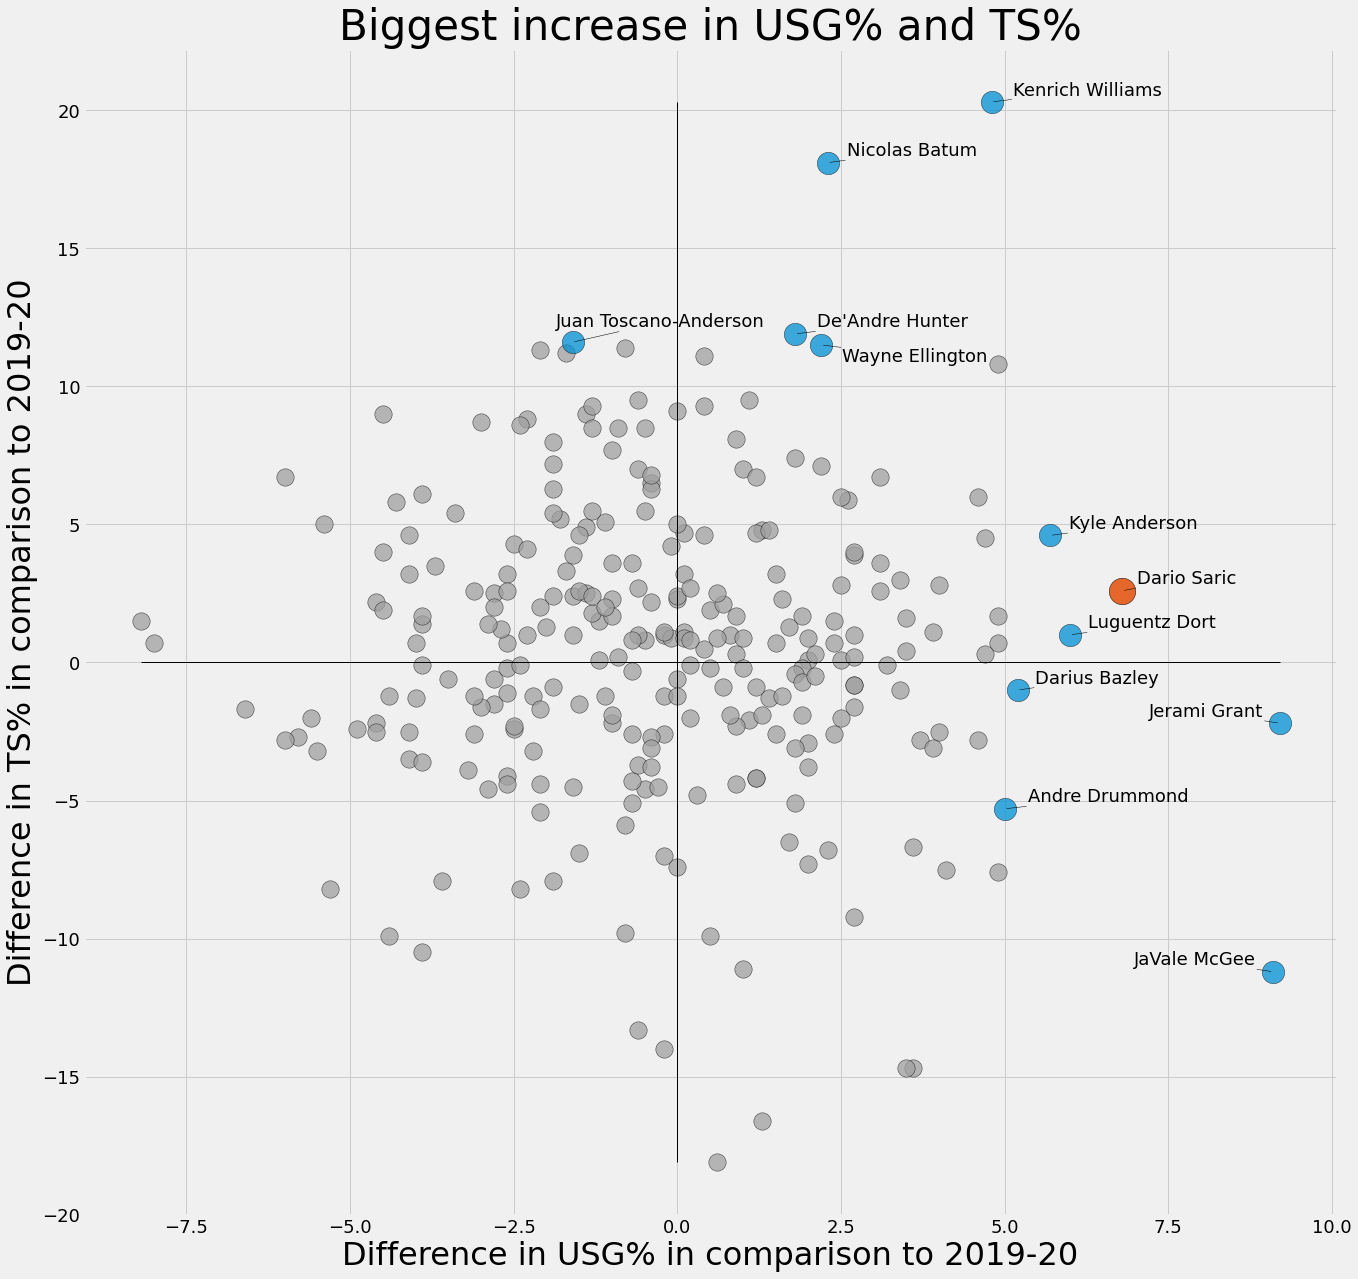

In [85]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.hlines(y=0, xmin=qualified.USG_DIFF.min(), xmax=qualified.USG_DIFF.max(), lw=1, color='black')
ax.vlines(x=0, ymin=qualified.TS_DIFF.min(), ymax=qualified.TS_DIFF.max(), lw=1, color='black')
ax.scatter(x=other.USG_DIFF, y=other.TS_DIFF, s=300, color='#A0A0A0', alpha=0.75, edgecolors='black')
ax.scatter(x=growth_top.USG_DIFF, y=growth_top.TS_DIFF, s=500, alpha=0.75, edgecolors='black')
ax.scatter(x=saric_qualy.USG_DIFF, y=saric_qualy.TS_DIFF, s=700, color=suns_primary, alpha=0.95, edgecolors='black')
#ax.scatter(x=target_bench.OFF_RATING_ON, y=target_bench.DEF_RATING_ON, s=500, alpha=0.95, edgecolors='black', label='Značajni bench igrači')
#ax.scatter(x=saric_only.OFF_RATING_ON, y=saric_only.DEF_RATING_ON, s=700, alpha=0.95, color=suns_primary, edgecolors='black', lw=1.0, label='Šiši')

texts = []

for index in range(len(growth_top)):
    item = growth_top.iloc[index]
    name = item.PLAYER_NAME
    texts.append(ax.text(x=item.USG_DIFF, y=item.TS_DIFF, s=name, size=18))
                         
for index in range(len(saric_qualy)):
    item = saric_qualy.iloc[index]
    name = item.PLAYER_NAME
    texts.append(ax.text(x=item.USG_DIFF, y=item.TS_DIFF, s=name, size=18))

ax.set_xlabel("Difference in USG% in comparison to 2019-20", size=32)
ax.set_ylabel("Difference in TS% in comparison to 2019-20", size=32)
ax.set_title("Biggest increase in USG% and TS%", size=42)
ax.tick_params(labelsize=18)
    

#ax.invert_yaxis()
#ax.invert_xaxis()
adjust_text(texts, expand_points=(1.3, 1.3), arrowprops={'arrowstyle': '-', 'color': 'black'})